<a href="https://colab.research.google.com/github/gsnila/breast-cancer.Wk.nirmala/blob/master/aprilworkwith4par.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import torch.nn as nn
import torch

from sklearn.exceptions import DataConversionWarning
dfFeatures = pd.read_csv('dataset.csv')

# dividing the dataset to labels and features
dfLabels = pd.DataFrame([1 if each == 'M' else 0 for each in dfFeatures.diagnosis], columns=["label"])
dfFeatures.drop(['id','diagnosis','Unnamed: 32'], axis = 1 ,inplace=True)

# normalizing the dataset.
dfFeatures = (dfFeatures - dfFeatures.min()) / (dfFeatures.max() - dfFeatures.min())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.decomposition import PCA

# constructing 3D model.
pca_3D_model = PCA(n_components = 3, whiten = True)
pca_3D_model.fit(dfFeatures)
npFeatures_3D = pca_3D_model.transform(dfFeatures)
dfFeatures_3D = pd.DataFrame(npFeatures_3D, columns=['param1', 'param2', 'param3'])
dfLabels_3D = dfLabels.copy()

# constructing 2D model.
pca_2D_model = PCA(n_components = 2, whiten = True)
pca_2D_model.fit(dfFeatures)
npFeatures_2D = pca_2D_model.transform(dfFeatures)
dfFeatures_2D = pd.DataFrame(npFeatures_2D, columns=['param1', 'param2'])
dfLabels_2D = dfLabels.copy()

# printing out the variance ratio and sum for 3D
print('-------------------------------------------------------------')
print('Variance Ratio: ' + str(pca_3D_model.explained_variance_ratio_))
print('Variance Sum  : ' + str(sum(pca_3D_model.explained_variance_ratio_)))
print('-------------------------------------------------------------')

# printing out the variance ratio and sum for 2D
print('-------------------------------------------------------------')
print('Variance Ratio for 2D: ' + str(pca_2D_model.explained_variance_ratio_))
print('Variance Sum for 2D : ' + str(sum(pca_2D_model.explained_variance_ratio_)))
print('-------------------------------------------------------------')

-------------------------------------------------------------
Variance Ratio: [0.53097689 0.1728349  0.07114442]
Variance Sum  : 0.7749562102025744
-------------------------------------------------------------
-------------------------------------------------------------
Variance Ratio for 2D: [0.53097689 0.1728349 ]
Variance Sum for 2D : 0.7038117901347686
-------------------------------------------------------------


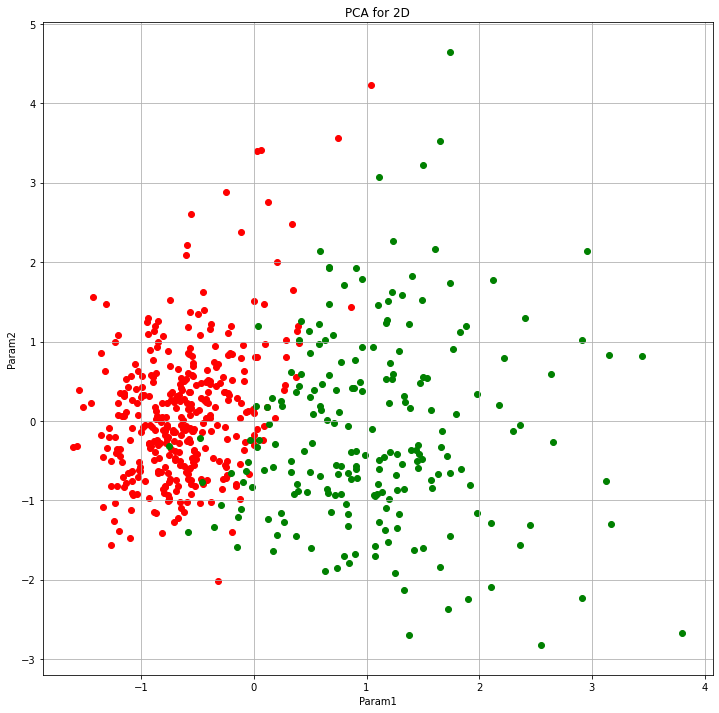

In [4]:
dfTemp_2D = pd.concat([dfFeatures_2D, dfLabels_2D], axis=1)
plt.figure(figsize=(12,12))
plt.scatter(dfTemp_2D.param1[dfTemp_2D.label == 0], dfTemp_2D.param2[dfTemp_2D.label == 0], color='red')
plt.scatter(dfTemp_2D.param1[dfTemp_2D.label == 1], dfTemp_2D.param2[dfTemp_2D.label == 1], color='green')
plt.xlabel('Param1')
plt.ylabel('Param2')
plt.title('PCA for 2D')
plt.grid()

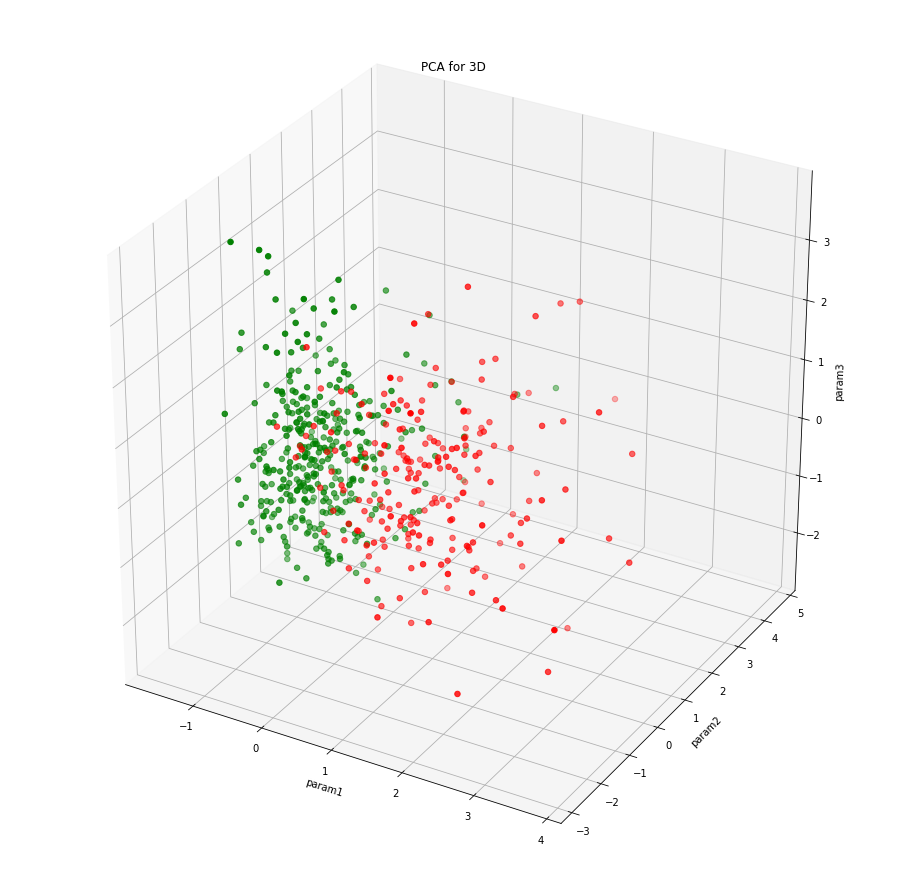

In [5]:
from mpl_toolkits.mplot3d import axes3d
dfTemp_3D = pd.concat([dfFeatures_3D, dfLabels_3D], axis=1)

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
x = dfTemp_3D.param1;
y = dfTemp_3D.param2;
z = dfTemp_3D.param3;

ax.scatter(x[dfTemp_3D.label == 0], y[dfTemp_3D.label == 0], z[dfTemp_3D.label == 0], c = 'g', marker = 'o', s=30)
ax.scatter(x[dfTemp_3D.label == 1], y[dfTemp_3D.label == 1], z[dfTemp_3D.label == 1], c = 'r', marker = 'o', s=30)
ax.set_xlabel('param1')
ax.set_ylabel('param2')
ax.set_zlabel('param3')
plt.title('PCA for 3D')
plt.show()

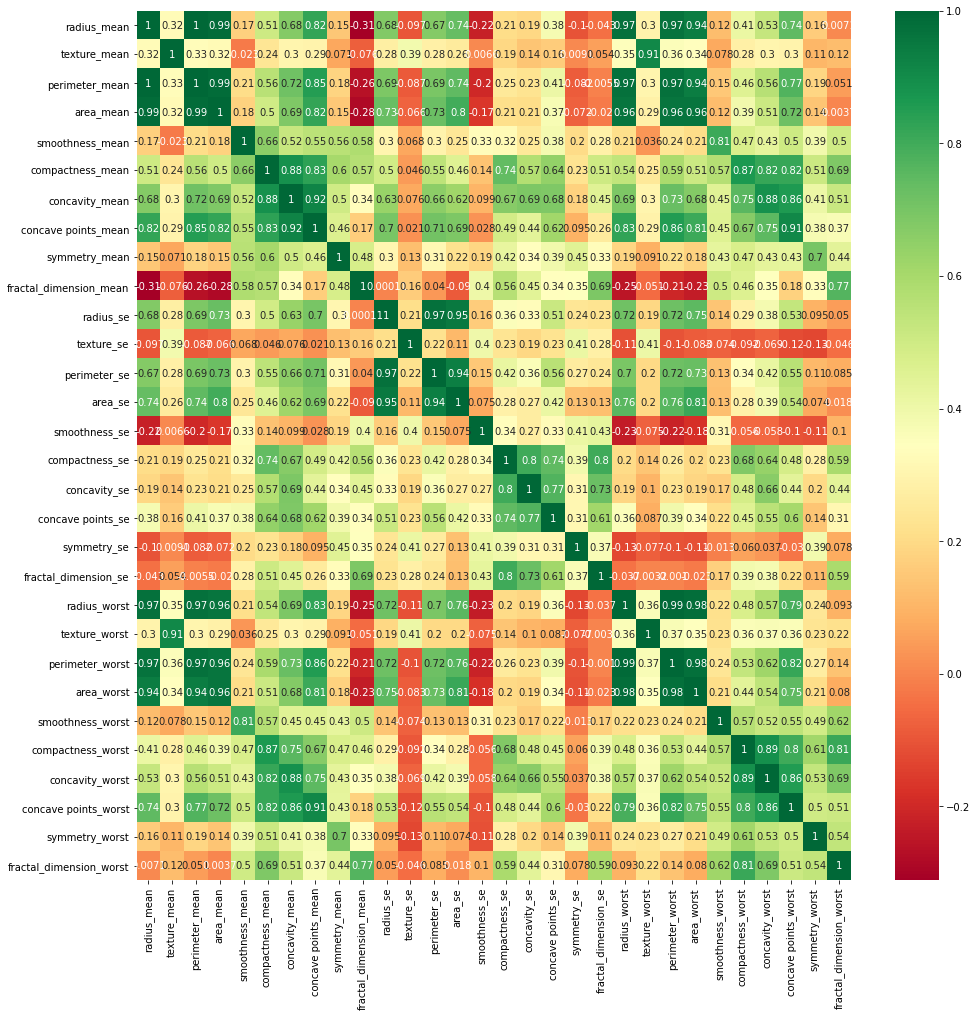

In [6]:
correlation_matrix = dfFeatures.corr()
top_correlated_features = correlation_matrix.index
plt.figure(figsize=(16, 16))
g=sns.heatmap(dfFeatures[top_correlated_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [7]:

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting best features with chi square statistical method
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(dfFeatures,dfLabels)
x_train_selected2 = fit.transform(dfFeatures)
df_scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfFeatures.columns)
#concat two dataframes for better visualization
fScores = pd.concat([dfcolumns,df_scores],axis=1)
fScores.columns = ['Features','Score']

# getting the best 4 features as a dataframe.
dfFeatures_10B = dfFeatures.iloc[:, [6,7,11,27]].copy()
dfLabels_10B = dfLabels.copy()

# printing out 4 Best features
fScores.nlargest(4,'Score')

,Features,Score
7,concave points_mean,52.405743
27,concave points_worst,46.341648
6,concavity_mean,46.186395
23,area_worst,35.043882


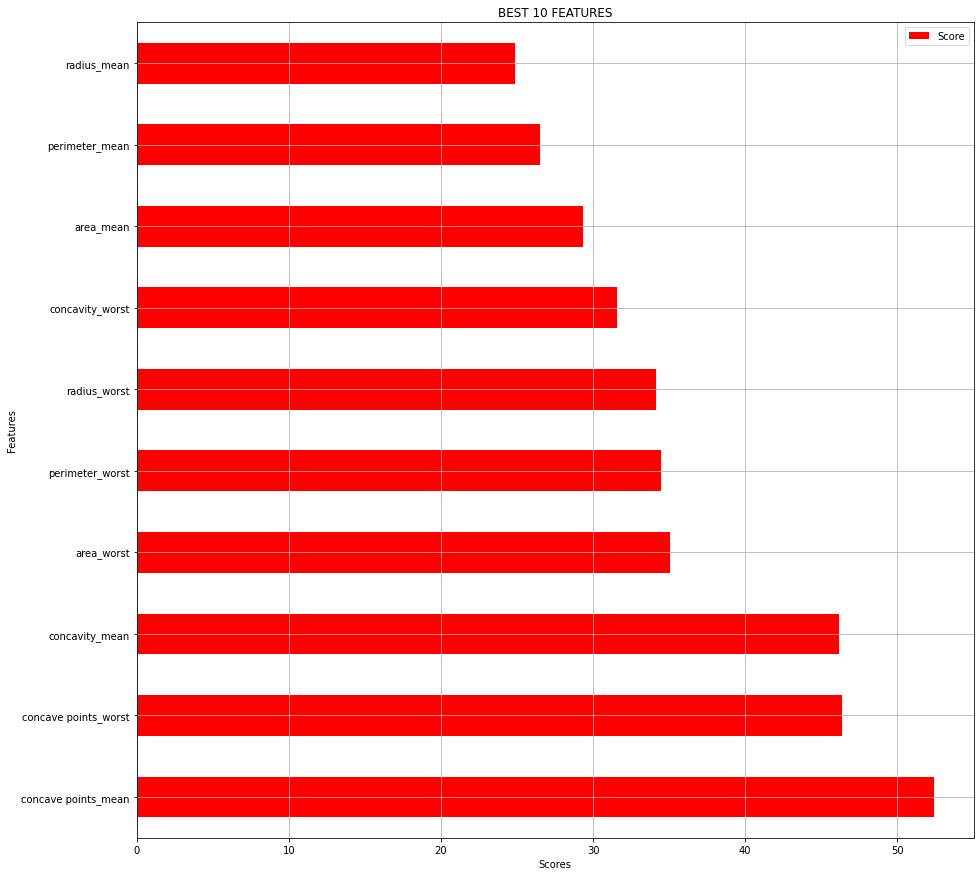

In [8]:
f, ax = plt.subplots(figsize = (15, 15))
fScores = fScores.nlargest(10,'Score')
fScores.index = fScores.Features      
fScores.plot(kind='barh', ax=ax, color="red")
plt.title("BEST 10 FEATURES")
plt.ylabel("Features")
plt.xlabel("Scores")
plt.grid()

In [0]:
from sklearn.model_selection import train_test_split

# splitting for initial data with 30 features
dfTrainFeatures, dfTestFeatures, dfTrainLabels, dfTestLabels = train_test_split(dfFeatures, dfLabels, test_size = 0.3, random_state = 10) 

# splitting for PCA data that has 3 dimensions.
from sklearn.model_selection import train_test_split
dfTrainFeatures_3D, dfTestFeatures_3D, dfTrainLabels_3D, dfTestLabels_3D = train_test_split(dfFeatures_3D, dfLabels_3D, test_size = 0.3, random_state = 10)

# splitting for PCA data that has 2 dimensions.
from sklearn.model_selection import train_test_split
dfTrainFeatures_2D, dfTestFeatures_2D, dfTrainLabels_2D, dfTestLabels_2D = train_test_split(dfFeatures_2D, dfLabels_2D, test_size = 0.3, random_state = 10)

# splitting for PCA data that has the best 4 features
from sklearn.model_selection import train_test_split
dfTrainFeatures_10B, dfTestFeatures_10B, dfTrainLabels_10B, dfTestLabels_10B = train_test_split(dfFeatures_10B, dfLabels_10B, test_size = 0.3, random_state = 10)

In [0]:
npTrainFeatures = dfTrainFeatures.values
npTestFeatures  = dfTestFeatures.values
npTrainLabels   = dfTrainLabels.values
npTestLabels    = dfTestLabels.values

npTrainFeatures_2D = dfTrainFeatures_2D.values
npTestFeatures_2D  = dfTestFeatures_2D.values
npTrainLabels_2D   = dfTrainLabels_2D.values
npTestLabels_2D    = dfTestLabels_2D.values

npTrainFeatures_3D = dfTrainFeatures_3D.values
npTestFeatures_3D  = dfTestFeatures_3D.values
npTrainLabels_3D   = dfTrainLabels_3D.values
npTestLabels_3D    = dfTestLabels_3D.values

npTrainFeatures_10B = dfTrainFeatures_10B.values
npTestFeatures_10B  = dfTestFeatures_10B.values
npTrainLabels_10B   = dfTrainLabels_10B.values
npTestLabels_10B    = dfTestLabels_10B.values

# converting numpy arrays also to tensors
tensorTrainFeatures = torch.tensor( npTrainFeatures )
tensorTestFeatures  = torch.tensor( npTestFeatures  )
tensorTrainLabels   = torch.tensor( npTrainLabels   )
tensorTestLabels    = torch.tensor( npTestLabels    )

tensorTrainFeatures_2D = torch.tensor( npTrainFeatures_2D )
tensorTestFeatures_2D  = torch.tensor( npTestFeatures_2D  )
tensorTrainLabels_2D   = torch.tensor( npTrainLabels_2D   )
tensorTestLabels_2D    = torch.tensor( npTestLabels_2D    )

tensorTrainFeatures_3D = torch.tensor( npTrainFeatures_3D )
tensorTestFeatures_3D  = torch.tensor( npTestFeatures_3D  )
tensorTrainLabels_3D   = torch.tensor( npTrainLabels_3D   )
tensorTestLabels_3D    = torch.tensor( npTestLabels_3D    )

tensorTrainFeatures_10B = torch.tensor( npTrainFeatures_10B )
tensorTestFeatures_10B  = torch.tensor( npTestFeatures_10B  )
tensorTrainLabels_10B   = torch.tensor( npTrainLabels_10B   )
tensorTestLabels_10B    = torch.tensor( npTestLabels_10B    )

In [11]:
from sklearn.linear_model import LogisticRegression

# applying logistic regression to initial data.
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_lr = logistic_regression_model.score(dfTestFeatures, dfTestLabels)
predictions_lr = logistic_regression_model.predict(dfTestFeatures)
predictions_lr_prob = logistic_regression_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_lr, macro_recall_lr, macro_fscore_lr, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr, average='macro')
micro_precision_lr, micro_recall_lr, micro_fscore_lr, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr, average='micro')


# applying logistic regression to PCA data that has 3 dimensions.
logistic_regression_model_3D = LogisticRegression()
logistic_regression_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_3D_lr = logistic_regression_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_lr_3D = logistic_regression_model_3D.predict(dfTestFeatures_3D)
predictions_lr_3D_prob = logistic_regression_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_lr_3D, macro_recall_lr_3D, macro_fscore_lr_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_3D, average='macro')
micro_precision_lr_3D, micro_recall_lr_3D, micro_fscore_lr_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_3D, average='micro')


# applying logistic regression to PCA data that has 2 dimensions.
logistic_regression_model_2D = LogisticRegression()
logistic_regression_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_2D_lr = logistic_regression_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_lr_2D = logistic_regression_model_2D.predict(dfTestFeatures_2D)
predictions_lr_2D_prob = logistic_regression_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_lr_2D, macro_recall_lr_2D, macro_fscore_lr_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_2D, average='macro')
micro_precision_lr_2D, micro_recall_lr_2D, micro_fscore_lr_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_2D, average='micro')


# applying logistic regression to PCA data that has 4 best features.
logistic_regression_model_10B = LogisticRegression()
logistic_regression_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acurracy_10B_lr = logistic_regression_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_lr_10B = logistic_regression_model_10B.predict(dfTestFeatures_10B)
predictions_lr_10B_prob = logistic_regression_model_10B.predict_proba(dfTestFeatures_10B)[:,1]
macro_precision_lr_10B, macro_recall_lr_10B, macro_fscore_lr_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_10B, average='macro')
micro_precision_lr_10B, micro_recall_lr_10B, micro_fscore_lr_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_10B, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [12]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_lr    ))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_2D_lr ))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_3D_lr ))
print('ACURRACY FOR (4 Best FEA.)  : ' + str(acurracy_10B_lr))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_lr))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_lr_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_lr_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_lr_10B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_lr))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_lr_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_lr_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_lr_10B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_lr))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_lr_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_lr_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_lr_10B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_lr))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_lr_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_lr_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_lr_10B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_lr))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_lr_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_lr_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_lr_10B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_lr))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_lr_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_lr_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_lr_10B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9941520467836257
ACURRACY FOR PCA (2DIMENSION): 0.9590643274853801
ACURRACY FOR PCA (3DIMENSION): 0.9707602339181286
ACURRACY FOR (4 Best FEA.)  : 0.9298245614035088
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.995575221238938
MACRO PRECISION PCA (2DIMENSION): 0.956438815990235
MACRO PRECISION PCA (3DIMENSION): 0.9631547795205682
MACRO PRECISION (4 Best FEA.)  : 0.9335625199872082
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9915254237288136
MACRO RECALL PCA (2DIMENSION): 0.9527088377723971
MACRO RECALL PCA (3DIMENSION): 0.9736682808716708
MACRO RECALL (4 Best FEA.)  : 0.9103359564164648
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9935042735042735
MACRO FSCORE PCA (2DIMENSION): 0.9545299145299144
MACRO FSCORE PCA (3DIMENSION): 0.9680266257806365
MACRO FSCORE (4 Best FE

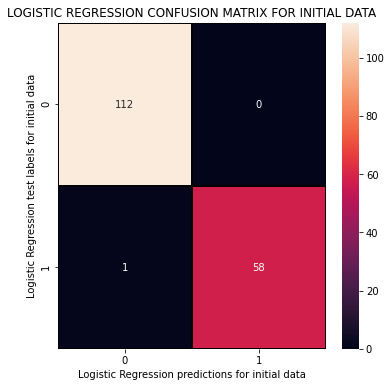

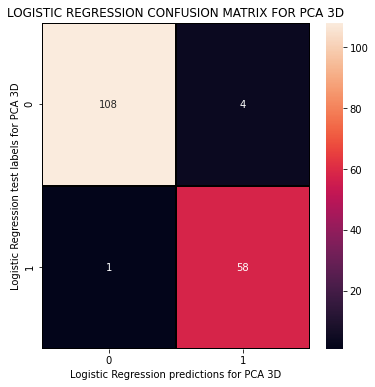

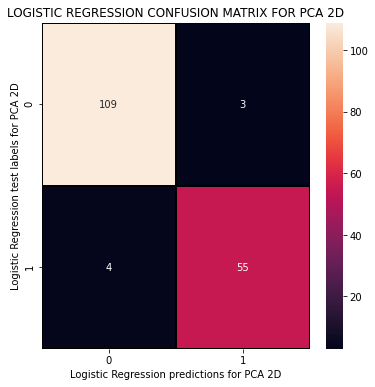

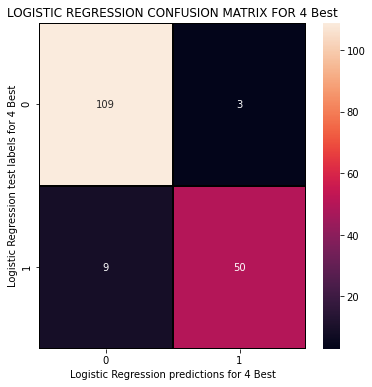

In [13]:
from sklearn.metrics import confusion_matrix
cm_logistic_regression     = confusion_matrix(dfTestLabels, predictions_lr)
cm_logistic_regression_3D  = confusion_matrix(dfTestLabels, predictions_lr_3D)
cm_logistic_regression_2D  = confusion_matrix(dfTestLabels, predictions_lr_2D)
cm_logistic_regression_10b = confusion_matrix(dfTestLabels, predictions_lr_10B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for initial data")
plt.ylabel("Logistic Regression test labels for initial data")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for PCA 3D")
plt.ylabel("Logistic Regression test labels for PCA 3D")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for PCA 2D")
plt.ylabel("Logistic Regression test labels for PCA 2D")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression_10b, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for 4 Best")
plt.ylabel("Logistic Regression test labels for 4 Best")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR 4 Best")
plt.show()

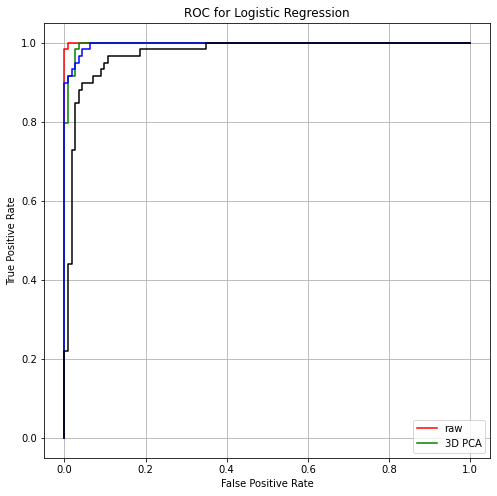

In [14]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_lr,     truePositiveRate_lr,     thresholds_lr     = roc_curve(dfTestLabels, predictions_lr_prob)
falsePositiveRate_lr_3D,  truePositiveRate_lr_3D,  thresholds_lr_3D  = roc_curve(dfTestLabels, predictions_lr_3D_prob)
falsePositiveRate_lr_2D,  truePositiveRate_lr_2D,  thresholds_lr_2D  = roc_curve(dfTestLabels, predictions_lr_2D_prob)
falsePositiveRate_lr_10B, truePositiveRate_lr_10B, thresholds_lr_10B = roc_curve(dfTestLabels, predictions_lr_10B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_lr, truePositiveRate_lr, color='red', label="raw")
plt.plot(falsePositiveRate_lr_3D,  truePositiveRate_lr_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_lr_2D,  truePositiveRate_lr_2D, color='blue', label="")
plt.plot(falsePositiveRate_lr_10B, truePositiveRate_lr_10B, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend()
plt.grid()

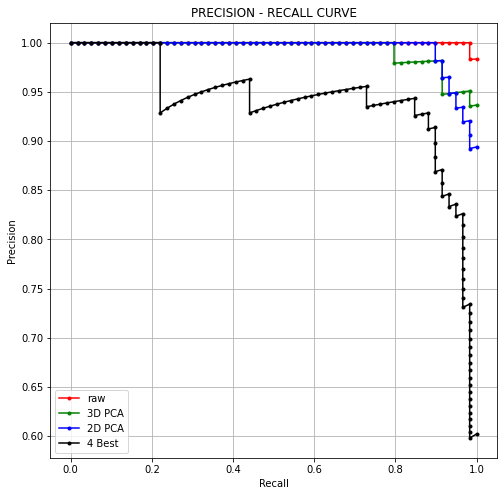

In [15]:
from sklearn.metrics import precision_recall_curve
precision_lr,     recall_lr,     _ = precision_recall_curve(npTestLabels,     predictions_lr_prob)
precision_lr_3D,  recall_lr_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_lr_3D_prob)
precision_lr_2D,  recall_lr_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_lr_2D_prob)
precision_lr_10B, recall_lr_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_lr_10B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_lr,     precision_lr,     marker='.', color="red", label="raw")
plt.plot(recall_lr_3D,  precision_lr_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_lr_2D,  precision_lr_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_lr_10B, precision_lr_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

accurracies_knn     = []
accurracies_3D_knn  = []
accurracies_2D_knn  = []
accurracies_10B_knn = []
mean_squared_error_knn = []
mean_squared_error_2D_knn = []
mean_squared_error_3D_knn = []
mean_squared_error_10B_knn = []

for n_neighbor in range(1,101):
    knn_model     = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn_model_3D  = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn_model_2D  = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn_model_10B = KNeighborsClassifier(n_neighbors = n_neighbor)
    
    knn_model.fit(dfTrainFeatures, dfTrainLabels)
    knn_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
    knn_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
    knn_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
    
    pred_knn = knn_model.predict(dfTestFeatures) 
    pred_2D_knn = knn_model_2D.predict(dfTestFeatures_2D) 
    pred_3D_knn = knn_model_3D.predict(dfTestFeatures_3D) 
    pred_10B_knn = knn_model_10B.predict(dfTestFeatures_10B) 
    
    acc     = knn_model.score(dfTestFeatures, dfTestLabels)
    acc_3D  = knn_model_3D.score(dfTestFeatures_3D,  dfTestLabels_3D)
    acc_2D  = knn_model_2D.score(dfTestFeatures_2D,  dfTestLabels_2D)
    acc_10B = knn_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
    
    mse = mean_squared_error(dfTestLabels,pred_knn,multioutput='raw_values')    
    mse_2D = mean_squared_error(dfTestLabels,pred_2D_knn,multioutput='raw_values')    
    mse_3D = mean_squared_error(dfTestLabels,pred_3D_knn,multioutput='raw_values')
    mse_10B = mean_squared_error(dfTestLabels,pred_10B_knn,multioutput='raw_values')
    
    mean_squared_error_knn.append(mse)
    mean_squared_error_2D_knn.append(mse_2D)
    mean_squared_error_3D_knn.append(mse_3D)
    mean_squared_error_10B_knn.append(mse_10B)
    
    accurracies_knn.append(acc)
    accurracies_3D_knn.append(acc_3D)
    accurracies_2D_knn.append(acc_2D)
    accurracies_10B_knn.append(acc_10B)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed

In [17]:
print('-----------------------------------')
print('-ACURRACY FOR DIFFERENT DATA TYPES-')
print('---ONLY K FROM 1 TO 10 ARE SHOWN---')
print('')

print('-----------------------------------')
print('-----ACURRACY FOR INITIAL DATA-----')
print('-----------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for initial data: ' + str(accurracies_knn[i]))
    
print('-----------------------------------')
print('------ACURRACY FOR PCA 3D DATA-----')
print('-----------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for pca 3D data: ' + str(accurracies_3D_knn[i]))
        
print('-----------------------------------')
print('------ACURRACY FOR PCA 2D DATA-----')
print('-----------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for pca 2D data: ' + str(accurracies_2D_knn[i]))
        
print('------------------------------------')
print('------ACURRACY FOR PCA 10B DATA-----')
print('------------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for pca 10B data: ' + str(accurracies_10B_knn[i]))

-----------------------------------
-ACURRACY FOR DIFFERENT DATA TYPES-
---ONLY K FROM 1 TO 10 ARE SHOWN---

-----------------------------------
-----ACURRACY FOR INITIAL DATA-----
-----------------------------------
1 nn acurracy for initial data: 0.9766081871345029
2 nn acurracy for initial data: 0.9707602339181286
3 nn acurracy for initial data: 0.9883040935672515
4 nn acurracy for initial data: 0.9707602339181286
5 nn acurracy for initial data: 0.9824561403508771
6 nn acurracy for initial data: 0.9824561403508771
7 nn acurracy for initial data: 0.9883040935672515
8 nn acurracy for initial data: 0.9766081871345029
9 nn acurracy for initial data: 0.9883040935672515
10 nn acurracy for initial data: 0.9766081871345029
-----------------------------------
------ACURRACY FOR PCA 3D DATA-----
-----------------------------------
1 nn acurracy for pca 3D data: 0.9181286549707602
2 nn acurracy for pca 3D data: 0.9415204678362573
3 nn acurracy for pca 3D data: 0.9532163742690059
4 nn acurracy 

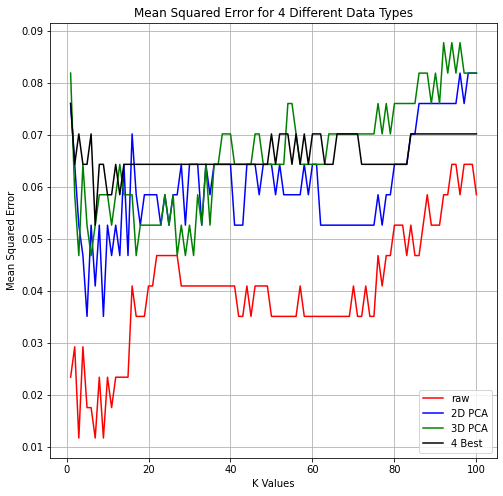

In [18]:
k = [i for i in range(1,101)]
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(k,mean_squared_error_knn,color='red', label="raw")
plt.plot(k,mean_squared_error_2D_knn,color='blue', label="2D PCA")
plt.plot(k,mean_squared_error_3D_knn,color='green', label="3D PCA")
plt.plot(k,mean_squared_error_10B_knn,color='black', label="4 Best")
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for 4 Different Data Types')
plt.legend()
plt.grid()

Best K value for K-NN is: 7


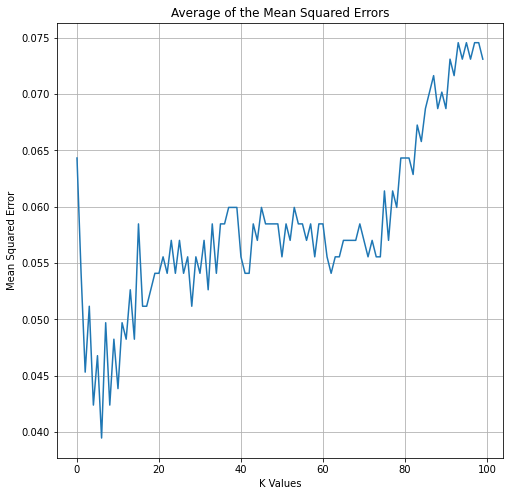

In [19]:
average_mse = []
for i in range(0,100):
    avg = (mean_squared_error_knn[i] + mean_squared_error_2D_knn[i] + mean_squared_error_3D_knn[i] + mean_squared_error_10B_knn[i]) / 4 
    average_mse.append(avg)

#KNN is equal to 7
best_knn = average_mse.index(min(average_mse)) + 1
print('Best K value for K-NN is: ' + str(best_knn))

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(average_mse)
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')
plt.title('Average of the Mean Squared Errors')
plt.grid()

In [20]:

# applying 7 nn to initial data.
knn_model = KNeighborsClassifier(n_neighbors = best_knn)
knn_model.fit(dfTrainFeatures, dfTrainLabels)
acc_knn = knn_model.score(dfTestFeatures, dfTestLabels)
predictions_knn = knn_model.predict(dfTestFeatures)
predictions_knn_prob = knn_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_knn, macro_recall_knn, macro_fscore_knn, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn, average='macro')
micro_precision_knn, micro_recall_knn, micro_fscore_knn, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn, average='micro')


# applying 7 nn to PCA 3D data.
knn_model_3D = KNeighborsClassifier(n_neighbors = best_knn)
knn_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acc_knn_3D = knn_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_knn_3D = knn_model_3D.predict(dfTestFeatures_3D)
predictions_knn_3D_prob = knn_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_knn_3D, macro_recall_knn_3D, macro_fscore_knn_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_3D, average='macro')
micro_precision_knn_3D, micro_recall_knn_3D, micro_fscore_knn_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_3D, average='micro')


# applying 7 nn to PCA 2D data.
knn_model_2D = KNeighborsClassifier(n_neighbors = best_knn)
knn_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acc_knn_2D = knn_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_knn_2D = knn_model_2D.predict(dfTestFeatures_2D)
predictions_knn_2D_prob = knn_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_knn_2D, macro_recall_knn_2D, macro_fscore_knn_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_2D, average='macro')
micro_precision_knn_2D, micro_recall_knn_2D, micro_fscore_knn_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_2D, average='micro')


# applying 7 nn to PCA 4 Best data.
knn_model_10B = KNeighborsClassifier(n_neighbors = best_knn)
knn_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acc_knn_10B = knn_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_knn_10B = knn_model_10B.predict(dfTestFeatures_10B)
predictions_knn_10B_prob = knn_model_10B.predict_proba(dfTestFeatures_10B)[:,1]
macro_precision_knn_10B, macro_recall_knn_10B, macro_fscore_knn_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_10B, average='macro')
micro_precision_knn_10B, micro_recall_knn_10B, micro_fscore_knn_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_10B, average='micro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [21]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA     : ' + str(acc_knn))
print('ACURRACY FOR PCA (2DIMENSION) : ' + str(acc_knn_3D))
print('ACURRACY FOR PCA (3DIMENSION) : ' + str(acc_knn_2D))
print('ACURRACY FOR (4 Best FEAT.)  : ' + str(acc_knn_10B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_knn))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_knn_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_knn_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_knn_10B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_knn))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_knn_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_knn_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_knn_10B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_knn))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_knn_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_knn_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_knn_10B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_knn))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_knn_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_knn_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_knn_10B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_knn))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_knn_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_knn_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_knn_10B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_knn))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_knn_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_knn_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_knn_10B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA     : 0.9883040935672515
ACURRACY FOR PCA (2DIMENSION) : 0.9473684210526315
ACURRACY FOR PCA (3DIMENSION) : 0.9590643274853801
ACURRACY FOR (4 Best FEAT.)  : 0.9473684210526315
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9870611380145279
MACRO PRECISION PCA (2DIMENSION): 0.9531531531531532
MACRO PRECISION PCA (3DIMENSION): 0.9433933475740006
MACRO PRECISION (4 Best FEA.)  : 0.9433933475740006
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9870611380145279
MACRO RECALL PCA (2DIMENSION): 0.9567191283292978
MACRO RECALL PCA (3DIMENSION): 0.9397699757869249
MACRO RECALL (4 Best FEA.)  : 0.9397699757869249
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9870611380145279
MACRO FSCORE PCA (2DIMENSION): 0.9548931680295436
MACRO FSCORE PCA (3DIMENSION): 0.9415384615384614
MACRO FSCORE (4 B

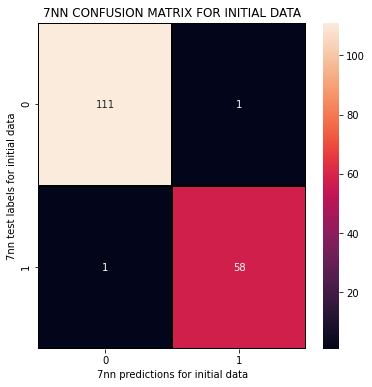

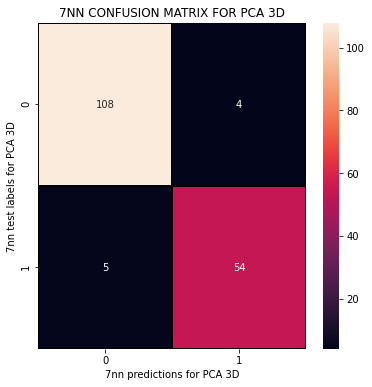

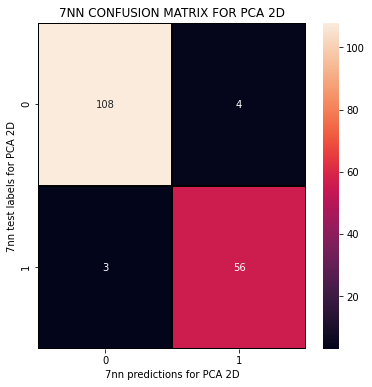

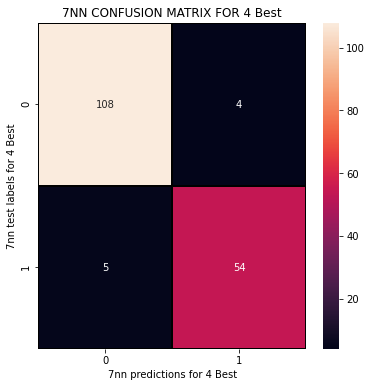

In [22]:
from sklearn.metrics import confusion_matrix
cm_7nn     = confusion_matrix(dfTestLabels, predictions_knn)
cm_7nn_3D  = confusion_matrix(dfTestLabels, predictions_knn_3D)
cm_7nn_2D  = confusion_matrix(dfTestLabels, predictions_knn_2D)
cm_7nn_10B = confusion_matrix(dfTestLabels, predictions_knn_10B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for initial data")
plt.ylabel("7nn test labels for initial data")
plt.title("7NN CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for PCA 3D")
plt.ylabel("7nn test labels for PCA 3D")
plt.title("7NN CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for PCA 2D")
plt.ylabel("7nn test labels for PCA 2D")
plt.title("7NN CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn_10B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for 4 Best")
plt.ylabel("7nn test labels for 4 Best")
plt.title("7NN CONFUSION MATRIX FOR 4 Best")
plt.show()

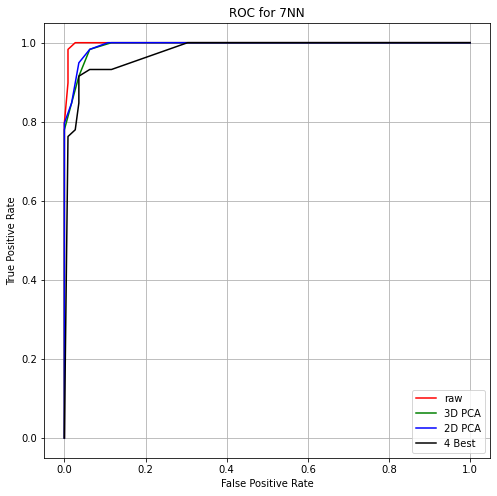

In [23]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_knn,     truePositiveRate_knn,     thresholds_knn     = roc_curve(dfTestLabels, predictions_knn_prob)
falsePositiveRate_knn_3D,  truePositiveRate_knn_3D,  thresholds_knn_3D  = roc_curve(dfTestLabels, predictions_knn_3D_prob)
falsePositiveRate_knn_2D,  truePositiveRate_knn_2D,  thresholds_knn_2D  = roc_curve(dfTestLabels, predictions_knn_2D_prob)
falsePositiveRate_knn_10B, truePositiveRate_knn_10B, thresholds_knn_10B = roc_curve(dfTestLabels, predictions_knn_10B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_knn,     truePositiveRate_knn,     color='red',   label="raw")
plt.plot(falsePositiveRate_knn_3D,  truePositiveRate_knn_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_knn_2D,  truePositiveRate_knn_2D,  color='blue',  label="2D PCA")
plt.plot(falsePositiveRate_knn_10B, truePositiveRate_knn_10B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 7NN')
plt.legend()
plt.grid()

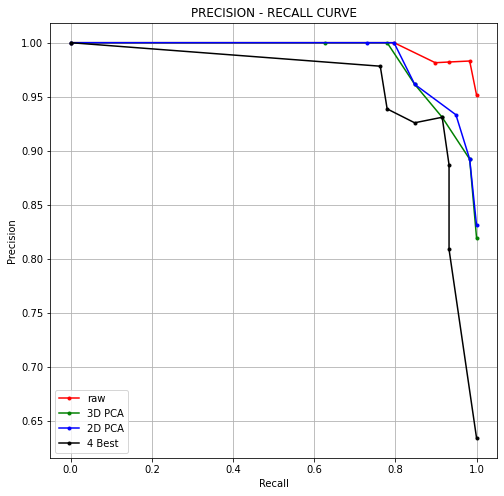

In [24]:
from sklearn.metrics import precision_recall_curve
precision_knn,     recall_knn,     _ = precision_recall_curve(npTestLabels,     predictions_knn_prob)
precision_knn_3D,  recall_knn_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_knn_3D_prob)
precision_knn_2D,  recall_knn_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_knn_2D_prob)
precision_knn_10B, recall_knn_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_knn_10B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_knn,     precision_knn,     marker='.', color="red", label="raw")
plt.plot(recall_knn_3D,  precision_knn_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_knn_2D,  precision_knn_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_knn_10B, precision_knn_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [25]:
from sklearn.svm import SVC

# applying svm to initial data.
svm_model = SVC(random_state = 1)
svm_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_svm = svm_model.score(dfTestFeatures, dfTestLabels)
predictions_svm = svm_model.predict(dfTestFeatures)
macro_precision_svm, macro_recall_svm, macro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm, average='macro')
micro_precision_svm, micro_recall_svm, micro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm, average='micro')

# applying svm to PCA data that has 3 dimensions.
svm_model_3D = SVC(random_state = 1)
svm_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_3D_svm = svm_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_svm_3D = svm_model_3D.predict(dfTestFeatures_3D)
macro_precision_svm_3D, macro_recall_svm_3D, macro_fscore_svm_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_3D, average='macro')
micro_precision_svm_3D, micro_recall_svm_3D, micro_fscore_svm_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_3D, average='micro')

# applying svm to PCA data that has 2 dimensions.
svm_model_2D = SVC(random_state = 1)
svm_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_2D_svm = svm_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_svm_2D = svm_model_2D.predict(dfTestFeatures_2D)
macro_precision_svm_2D, macro_recall_svm_2D, macro_fscore_svm_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_2D, average='macro')
micro_precision_svm_2D, micro_recall_svm_2D, micro_fscore_svm_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_2D, average='micro')

# applying svm to data that has 4 Best Features
svm_model_10B = SVC(random_state = 1)
svm_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acurracy_10B_svm = svm_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_svm_10B = svm_model_10B.predict(dfTestFeatures_10B)
macro_precision_svm_10B, macro_recall_svm_10B, macro_fscore_svm_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_10B, average='macro')
micro_precision_svm_10B, micro_recall_svm_10B, micro_fscore_svm_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_10B, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [26]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_svm))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_3D_svm))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_2D_svm))
print('ACURRACY FOR (4 Best FEAT.) : ' + str(acurracy_10B_svm))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_svm))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_svm_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_svm_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_svm_10B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_svm))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_svm_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_svm_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_svm_10B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_svm))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_svm_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_svm_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_svm_10B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_svm))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_svm_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_svm_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_svm_10B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_svm))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_svm_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_svm_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_svm_10B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_svm))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_svm_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_svm_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_svm_10B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9766081871345029
ACURRACY FOR PCA (2DIMENSION): 0.9707602339181286
ACURRACY FOR PCA (3DIMENSION): 0.9590643274853801
ACURRACY FOR (4 Best FEAT.) : 0.9415204678362573
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9682539682539683
MACRO PRECISION PCA (2DIMENSION): 0.9531531531531532
MACRO PRECISION PCA (3DIMENSION): 0.965990990990991
MACRO PRECISION (4 Best FEA.)  : 0.9472337703869523
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9821428571428572
MACRO RECALL PCA (2DIMENSION): 0.9567191283292978
MACRO RECALL PCA (3DIMENSION): 0.96965799031477
MACRO RECALL (4 Best FEA.)  : 0.923274818401937
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9745156482861401
MACRO FSCORE PCA (2DIMENSION): 0.9548931680295436
MACRO FSCORE PCA (3DIMENSION): 0.9677808343068168
MACRO FSCORE (4 Best FEA.

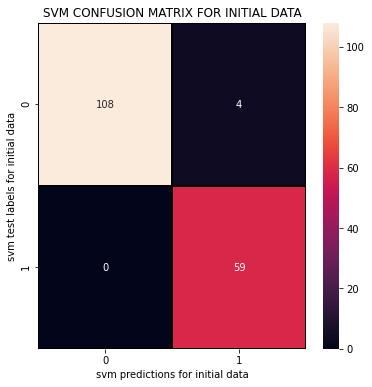

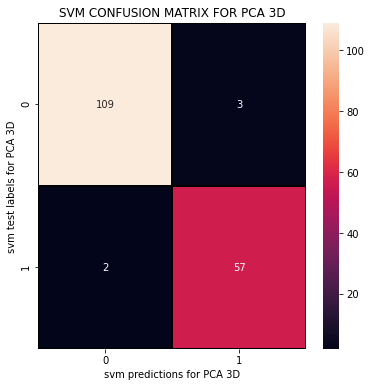

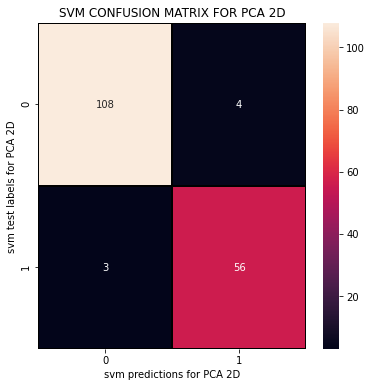

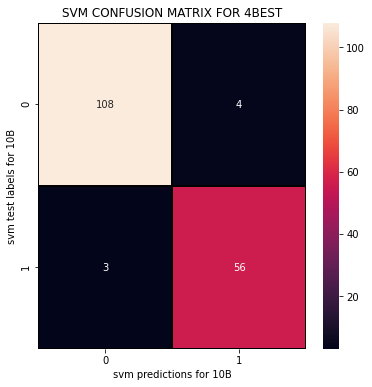

In [73]:
from sklearn.metrics import confusion_matrix
cm_svm     = confusion_matrix(dfTestLabels, predictions_svm)
cm_svm_3D  = confusion_matrix(dfTestLabels, predictions_svm_3D)
cm_svm_2D  = confusion_matrix(dfTestLabels, predictions_svm_2D)
cm_svm_10B = confusion_matrix(dfTestLabels, predictions_svm_10B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for initial data")
plt.ylabel("svm test labels for initial data")
plt.title("SVM CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for PCA 3D")
plt.ylabel("svm test labels for PCA 3D")
plt.title("SVM CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for PCA 2D")
plt.ylabel("svm test labels for PCA 2D")
plt.title("SVM CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for 10B")
plt.ylabel("svm test labels for 10B")
plt.title("SVM CONFUSION MATRIX FOR 4BEST")
plt.show()

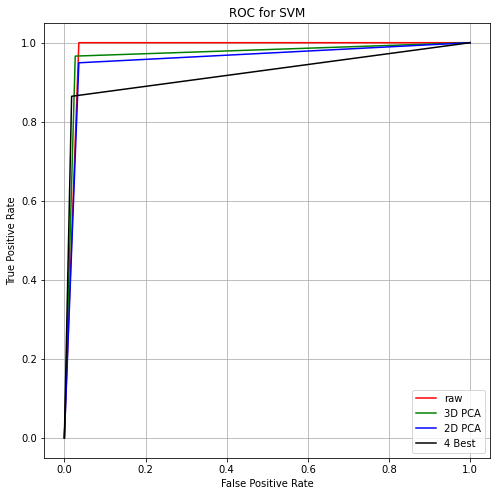

In [28]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_svm,     truePositiveRate_svm,     thresholds_svm     = roc_curve(dfTestLabels, predictions_svm)
falsePositiveRate_svm_3D,  truePositiveRate_svm_3D,  thresholds_svm_3D  = roc_curve(dfTestLabels, predictions_svm_3D)
falsePositiveRate_svm_2D,  truePositiveRate_svm_2D,  thresholds_svm_2D  = roc_curve(dfTestLabels, predictions_svm_2D)
falsePositiveRate_svm_10B, truePositiveRate_svm_10B, thresholds_svm_10B = roc_curve(dfTestLabels, predictions_svm_10B)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_svm,     truePositiveRate_svm,     color='red', label="raw")
plt.plot(falsePositiveRate_svm_3D,  truePositiveRate_svm_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_svm_2D,  truePositiveRate_svm_2D,  color='blue', label="2D PCA")
plt.plot(falsePositiveRate_svm_10B, truePositiveRate_svm_10B, color='black', label="4 Best")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend()
plt.grid()


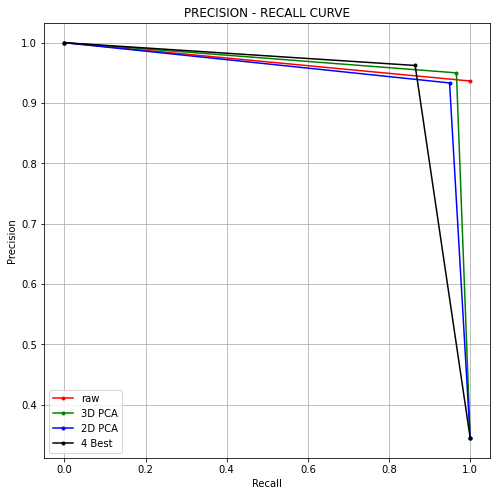

In [29]:
from sklearn.metrics import precision_recall_curve
precision_svm,     recall_svm,     _ = precision_recall_curve(npTestLabels,     predictions_svm)
precision_svm_3D,  recall_svm_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_svm_3D)
precision_svm_2D,  recall_svm_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_svm_2D)
precision_svm_10B, recall_svm_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_svm_10B)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_svm,     precision_svm,     marker='.', color="red", label="raw")
plt.plot(recall_svm_3D,  precision_svm_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_svm_2D,  precision_svm_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_svm_10B, precision_svm_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [30]:
from sklearn.svm import SVC
import math
import numpy as np

#trying the model with different gamma values
gammaValues = np.array([
        math.pow(2, -4), 
        math.pow(2, -3), 
        math.pow(2, -2), 
        math.pow(2,  0), 
        math.pow(2,  1)
    ])

acurracy_svm_arr = []
acurracy_svm2D_arr = []
acurracy_svm3D_arr = []
acurracy_svm10_arr = []

macro_precision_svm_arr = []
macro_precision_svm2D_arr = []
macro_precision_svm3D_arr = []
macro_precision_svm10_arr = []

macro_recall_svm_arr = []
macro_recall_svm2D_arr = []
macro_recall_svm3D_arr = []
macro_recall_svm10_arr = []

micro_precision_svm_arr = []
micro_precision_svm2D_arr = []
micro_precision_svm3D_arr = []
micro_precision_svm10_arr = []

micro_recall_svm_arr = []
micro_recall_svm2D_arr = []
micro_recall_svm3D_arr = []
micro_recall_svm10_arr = []

# applying svm to initial data for different gamma values.
count=0
for x in gammaValues: 
    
    # constructing the SVM model for different gamma values.
    svm_model = SVC(random_state = 1, gamma=x)
    svm_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_svm = svm_model.score(dfTestFeatures, dfTestLabels)
    macro_precision_svm, macro_recall_svm, macro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, svm_model.predict(dfTestFeatures), average='macro')
    micro_precision_svm, micro_recall_svm, micro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, svm_model.predict(dfTestFeatures), average='micro')
    
    #COPYING VALUES TO THEIR ARRAYS
    acurracy_svm_arr = np.append(acurracy_svm_arr,acurracy_svm)
    macro_precision_svm_arr = np.append(macro_precision_svm_arr,macro_precision_svm)
    macro_recall_svm_arr = np.append(macro_recall_svm_arr,macro_recall_svm)
    micro_precision_svm_arr = np.append(micro_precision_svm_arr,micro_precision_svm)
    micro_recall_svm_arr = np.append(micro_recall_svm_arr,micro_recall_svm)
    
    # applying svm to PCA data that has 3 dimensions.
    svm_model_3D = SVC(random_state = 1, gamma=x)
    svm_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
    acurracy_3D_svm = svm_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
    macro_precision_svm_3D, macro_recall_svm_3D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_3D.predict(dfTestFeatures_3D), average='macro')
    micro_precision_svm_3D, micro_recall_svm_3D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_3D.predict(dfTestFeatures_3D), average='micro')
    
    #COPYING VLUES TO THEIR ARRAYS 3D
    acurracy_svm3D_arr = np.append(acurracy_svm3D_arr,acurracy_3D_svm)
    macro_precision_svm3D_arr = np.append(macro_precision_svm3D_arr,macro_precision_svm_3D)
    macro_recall_svm3D_arr = np.append(macro_recall_svm3D_arr,macro_recall_svm_3D)
    micro_precision_svm3D_arr = np.append(micro_precision_svm3D_arr,micro_precision_svm_3D)
    micro_recall_svm3D_arr = np.append(micro_recall_svm3D_arr,micro_recall_svm_3D)
    
    # applying svm to PCA data that has 2 dimensions.
    svm_model_2D = SVC(random_state = 1,gamma=x)
    svm_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
    acurracy_2D_svm = svm_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
    macro_precision_svm_2D, macro_recall_svm_2D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_2D.predict(dfTestFeatures_2D), average='macro')
    micro_precision_svm_2D, micro_recall_svm_2D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_2D.predict(dfTestFeatures_2D), average='micro')
    
    #COPYING VLUES TO THEIR ARRAYS 2D
    acurracy_svm2D_arr = np.append(acurracy_svm2D_arr,acurracy_2D_svm)
    macro_precision_svm2D_arr = np.append(macro_precision_svm2D_arr,macro_precision_svm_2D)
    macro_recall_svm2D_arr = np.append(macro_recall_svm2D_arr,macro_recall_svm_2D)
    micro_precision_svm2D_arr = np.append(micro_precision_svm2D_arr,micro_precision_svm_2D)
    micro_recall_svm2D_arr = np.append(micro_recall_svm2D_arr,micro_recall_svm_2D)
    
    # applying svm to data that has 4 Best Features
    svm_model_10B = SVC(random_state = 1, gamma=x)
    svm_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
    acurracy_10B_svm = svm_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
    macro_precision_svm_10B, macro_recall_svm_10B, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_10B.predict(dfTestFeatures_10B), average='macro')
    micro_precision_svm_10B, micro_recall_svm_10B, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_10B.predict(dfTestFeatures_10B), average='micro')
    
    #COPYING VLUES TO THEIR ARRAYS 10
    acurracy_svm10_arr = np.append(acurracy_svm10_arr,acurracy_10B_svm)
    macro_precision_svm10_arr = np.append(macro_precision_svm10_arr,macro_precision_svm_10B)
    macro_recall_svm10_arr = np.append(macro_recall_svm10_arr,macro_recall_svm_10B)
    micro_precision_svm10_arr = np.append(micro_precision_svm10_arr,micro_precision_svm_10B)
    micro_recall_svm10_arr = np.append(micro_recall_svm10_arr,micro_recall_svm_10B)
    count += 1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [31]:
print("------------------------------------------------------------------------------------")
print("ACRRACIES RAW: " + str(acurracy_svm_arr))
print("ACRRACIES 3D : " + str(acurracy_svm3D_arr))
print("ACRRACIES 2D : " + str(acurracy_svm2D_arr))
print("ACRRACIES 10B: " + str(acurracy_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MACRO PRECISION RAW: " + str(macro_precision_svm_arr))
print("MACRO PRECISION 3D : " + str(macro_precision_svm2D_arr))
print("MACRO PRECISION 2D : " + str(macro_precision_svm3D_arr))
print("MACRO PRECISION 10B: " + str(macro_precision_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MACRO RECALL RAW: " + str(macro_recall_svm_arr))
print("MACRO RECALL 3D : " + str(macro_recall_svm2D_arr))
print("MACRO RECALL 2D : " + str(macro_recall_svm3D_arr))
print("MACRO RECALL 10B: " + str(macro_recall_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MICRO PRECISION RAW: " + str(micro_precision_svm_arr))
print("MICRO PRECISION 3D : " + str(micro_precision_svm2D_arr))
print("MICRO PRECISION 2D : " + str(micro_precision_svm3D_arr))
print("MICRO PRECISION 10B: " + str(micro_precision_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MICRO RECALL RAW: " + str(micro_recall_svm_arr))
print("MICRO RECALL 3D : " + str(micro_recall_svm2D_arr))
print("MICRO RECALL 2D : " + str(micro_recall_svm3D_arr))
print("MICRO RECALL 10B: " + str(micro_recall_svm10_arr))
print("------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------
ACRRACIES RAW: [0.96491228 0.97660819 0.99415205 0.97660819 0.97076023]
ACRRACIES 3D : [0.96491228 0.97076023 0.96491228 0.97076023 0.95321637]
ACRRACIES 2D : [0.94736842 0.96491228 0.96491228 0.97076023 0.95906433]
ACRRACIES 10B: [0.9122807  0.92397661 0.92982456 0.92397661 0.92397661]
------------------------------------------------------------------------------------
MACRO PRECISION RAW: [0.97457627 0.98275862 0.99557522 0.96825397 0.9609375 ]
MACRO PRECISION 3D : [0.94712733 0.96118341 0.96118341 0.96599099 0.95315315]
MACRO PRECISION 2D : [0.95812221 0.96315478 0.95568783 0.96315478 0.94143687]
MACRO PRECISION 10B: [0.92041322 0.92913704 0.93356252 0.92450142 0.92450142]
------------------------------------------------------------------------------------
MACRO RECALL RAW: [0.94915254 0.96610169 0.99152542 0.98214286 0.97767857]
MACRO RECALL 3D : [0.93575969 0.96118341 0.96118341 0.96965799 0.95671

ValueError: ignored

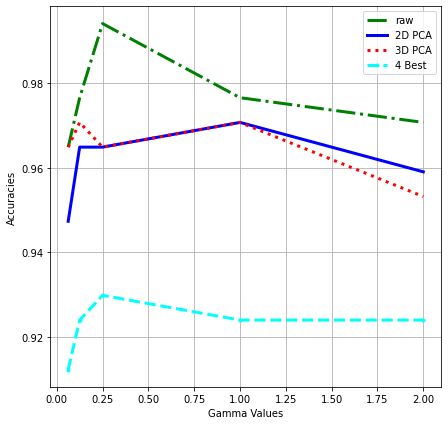

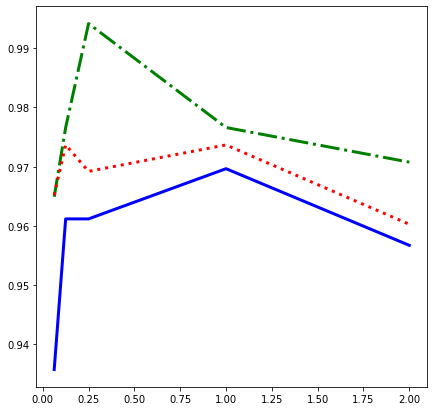

In [32]:
f, ax = plt.subplots(figsize = (7, 7))
plt.plot(gammaValues, acurracy_svm_arr, '-.',color='green', linewidth=3, label='raw')
plt.plot(gammaValues, acurracy_svm2D_arr,'-',color='blue', linewidth=3, label='2D PCA')
plt.plot(gammaValues, acurracy_svm3D_arr,':' ,color='red', linewidth=3, label='3D PCA')
plt.plot(gammaValues, acurracy_svm10_arr,'r--.', color='cyan', linewidth=3, label='4 Best')
plt.xlabel('Gamma Values')
plt.ylabel('Accuracies')
plt.legend()
plt.grid()

f, ax = plt.subplots(figsize = (7, 7))
plt.plot(gammaValues, micro_recall_svm_arr,'-.',color='green', linewidth=3, label='raw')
plt.plot(gammaValues, macro_recall_svm2D_arr,'-',color='blue', linewidth=3, label='2D PCA')
plt.plot(gammaValues, macro_recall_svm3D_arr,':' ,color='red', linewidth=3, label='3D PCA')
plt.plot(gammaValues, macro_recall_svm10_arr,'r---.', color='cyan', linewidth=3, label='4 Best')
plt.xlabel('Gamma Values')
plt.ylabel('Macro Recall Values')
plt.legend()
plt.grid()

f, ax = plt.subplots(figsize = (7, 7))
plt.plot(gammaValues, micro_precision_svm_arr,'-.',color='green', linewidth=3, label='raw')
plt.plot(gammaValues, macro_precision_svm2D_arr,'-',color='blue', linewidth=3, label='2D PCA')
plt.plot(gammaValues, macro_precision_svm3D_arr,':' ,color='red', linewidth=3, label='3D PCA')
plt.xlabel('Gamma Values')
plt.ylabel('Macro Precision Values')
plt.legend()
plt.grid()


In [0]:
from sklearn.tree import DecisionTreeClassifier

# applying Decision Tree Classification to initial data.
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_dt = decision_tree_model.score(dfTestFeatures, dfTestLabels)
predictions_dt = decision_tree_model.predict(dfTestFeatures)
predictions_dt_prob = decision_tree_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_dt, macro_recall_dt, macro_fscore_dt, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt, average='macro')
micro_precision_dt, micro_recall_dt, micro_fscore_dt, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt, average='micro')

# applying Decision Tree Classification to PCA data that has 3 dimensions.
decision_tree_model_3D = DecisionTreeClassifier()
decision_tree_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_dt_3D = decision_tree_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_dt_3D = decision_tree_model_3D.predict(dfTestFeatures_3D)
predictions_dt_3D_prob = decision_tree_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_dt_3D, macro_recall_dt_3D, macro_fscore_dt_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_3D, average='macro')
micro_precision_dt_3D, micro_recall_dt_3D, micro_fscore_dt_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_3D, average='micro')

# applying Decision Tree Classification to PCA data that has 2 dimensions.
decision_tree_model_2D = DecisionTreeClassifier()
decision_tree_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_dt_2D = decision_tree_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_dt_2D = decision_tree_model_2D.predict(dfTestFeatures_2D)
predictions_dt_2D_prob = decision_tree_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_dt_2D, macro_recall_dt_2D, macro_fscore_dt_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_2D, average='macro')
micro_precision_dt_2D, micro_recall_dt_2D, micro_fscore_dt_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_2D, average='micro')

# applying Decision Tree Classification to data that has 4 Best Features.
decision_tree_model_10B = DecisionTreeClassifier()
decision_tree_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acurracy_dt_10B = decision_tree_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_dt_10B = decision_tree_model_2D.predict(dfTestFeatures_2D)
predictions_dt_10B_prob = decision_tree_model_10B.predict_proba(dfTestFeatures_10B)[:,1]
macro_precision_dt_10B, macro_recall_dt_10B, macro_fscore_dt_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_10B, average='macro')
micro_precision_dt_10B, micro_recall_dt_10B, micro_fscore_dt_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_10B, average='micro')

In [35]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_dt))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_dt_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_dt_2D))
print('ACURRACY FOR (4 Best FEAT.) : ' + str(acurracy_dt_10B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_dt))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_dt_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_dt_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_dt_10B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_dt))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_dt_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_dt_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_dt_10B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_dt))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_dt_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_dt_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_dt_10B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_dt))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_dt_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_dt_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_dt_10B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_dt))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_dt_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_dt_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_dt_10B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_dt))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_dt_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_dt_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_dt_10B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9181286549707602
ACURRACY FOR PCA (3DIMENSION): 0.9415204678362573
ACURRACY FOR PCA (2DIMENSION): 0.9415204678362573
ACURRACY FOR (4 Best FEAT.) : 0.9005847953216374
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9094279661016949
MACRO PRECISION PCA (2DIMENSION): 0.9290275761973875
MACRO PRECISION PCA (3DIMENSION): 0.9290275761973875
MACRO PRECISION (4 Best FEA.)  : 0.9290275761973875
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9094279661016949
MACRO RECALL PCA (2DIMENSION): 0.9473365617433414
MACRO RECALL PCA (3DIMENSION): 0.9473365617433414
MACRO RECALL (4 Best FEA.)  : 0.9473365617433414
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9094279661016949
MACRO FSCORE PCA (2DIMENSION): 0.9367416395383248
MACRO FSCORE PCA (3DIMENSION): 0.9367416395383248
MACRO FSCORE (4 Best 

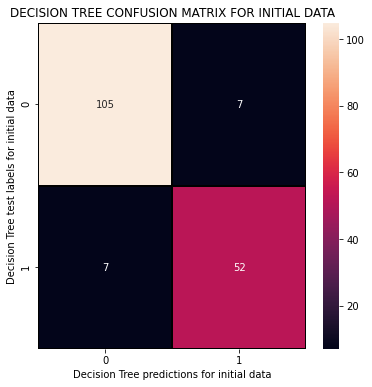

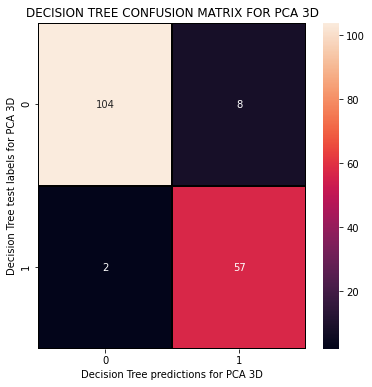

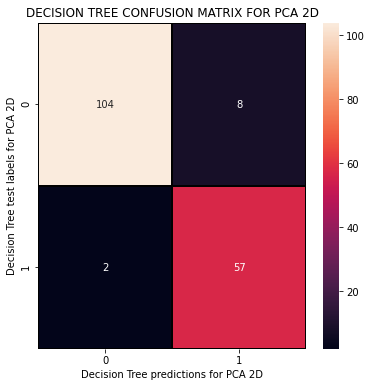

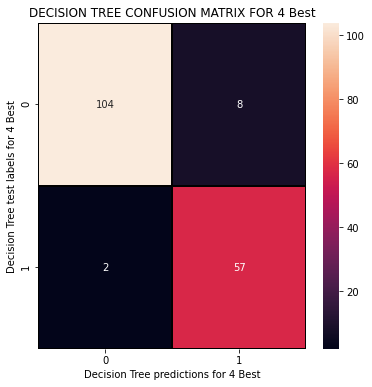

In [36]:
from sklearn.metrics import confusion_matrix
cm_decision_tree     = confusion_matrix(dfTestLabels, predictions_dt)
cm_decision_tree_3D  = confusion_matrix(dfTestLabels, predictions_dt_3D)
cm_decision_tree_2D  = confusion_matrix(dfTestLabels, predictions_dt_2D)
cm_decision_tree_10B = confusion_matrix(dfTestLabels, predictions_dt_10B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for initial data")
plt.ylabel("Decision Tree test labels for initial data")
plt.title("DECISION TREE CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for PCA 3D")
plt.ylabel("Decision Tree test labels for PCA 3D")
plt.title("DECISION TREE CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for PCA 2D")
plt.ylabel("Decision Tree test labels for PCA 2D")
plt.title("DECISION TREE CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree_10B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for 4 Best")
plt.ylabel("Decision Tree test labels for 4 Best")
plt.title("DECISION TREE CONFUSION MATRIX FOR 4 Best")
plt.show()

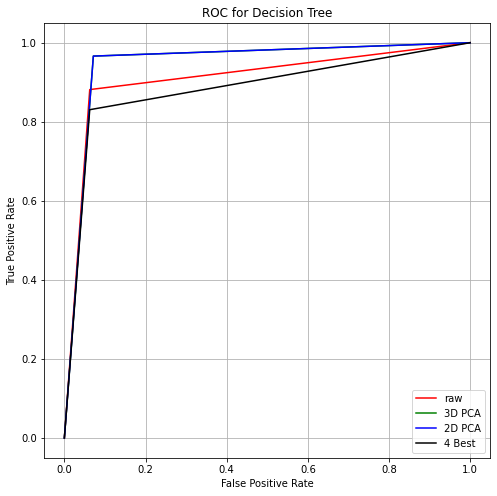

In [37]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_dt,     truePositiveRate_dt,     thresholds_dt     = roc_curve(dfTestLabels, predictions_dt_prob)
falsePositiveRate_dt_3D,  truePositiveRate_dt_3D,  thresholds_dt_3D  = roc_curve(dfTestLabels, predictions_dt_3D_prob)
falsePositiveRate_dt_2D,  truePositiveRate_dt_2D,  thresholds_dt_2D  = roc_curve(dfTestLabels, predictions_dt_2D_prob)
falsePositiveRate_dt_10B, truePositiveRate_dt_10B, thresholds_dt_10B = roc_curve(dfTestLabels, predictions_dt_10B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_dt, truePositiveRate_dt, color='red', label="raw")
plt.plot(falsePositiveRate_dt_3D, truePositiveRate_dt_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_dt_2D, truePositiveRate_dt_2D, color='blue', label="2D PCA")
plt.plot(falsePositiveRate_dt_10B, truePositiveRate_dt_10B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend()
plt.grid()

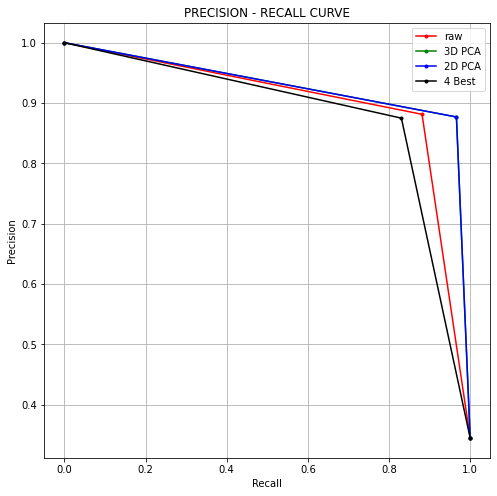

In [38]:
from sklearn.metrics import precision_recall_curve
precision_dt,     recall_dt,     _ = precision_recall_curve(npTestLabels,     predictions_dt_prob)
precision_dt_3D,  recall_dt_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_dt_3D_prob)
precision_dt_2D,  recall_dt_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_dt_2D_prob)
precision_dt_10B, recall_dt_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_dt_10B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_dt,     precision_dt,     marker='.', color="red", label="raw")
plt.plot(recall_dt_3D,  precision_dt_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_dt_2D,  precision_dt_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_dt_10B, precision_dt_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

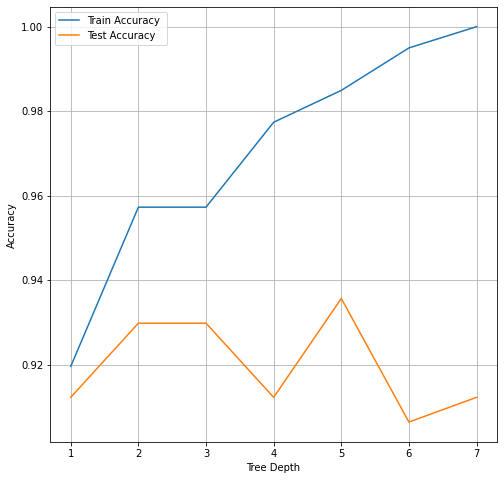

In [39]:
train_acc = []
test_acc = []

for i in range(1,8):
    decision_tree_model = DecisionTreeClassifier(max_depth=i)
    decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_dt_FS = decision_tree_model.score(dfTestFeatures, dfTestLabels)
    acurracy_dt_FS_train = decision_tree_model.score(dfTrainFeatures, dfTrainLabels)
    train_acc.append(acurracy_dt_FS_train)
    test_acc.append(acurracy_dt_FS)

# plotting the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(np.linspace(1,7, 7, endpoint=True),train_acc,label= "Train Accuracy ")
plt.plot(np.linspace(1,7, 7, endpoint=True),test_acc,label = "Test Accuracy")
plt.legend(loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Tree Depth")
plt.grid()

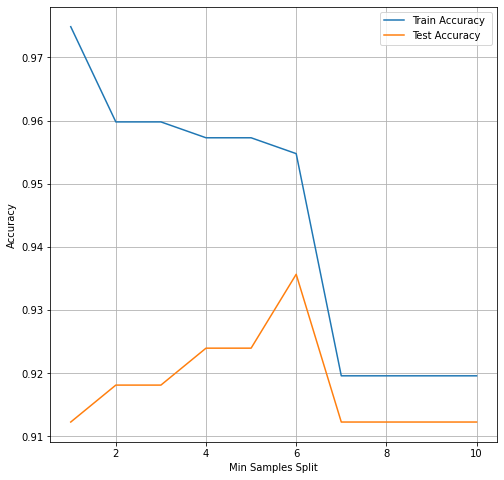

In [40]:
train_acc = []
test_acc = []
Arr = np.linspace(0.1,1,10)

for i in Arr:
    decision_tree_model = DecisionTreeClassifier(min_samples_split=i)
    decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_dt_FS = decision_tree_model.score(dfTestFeatures, dfTestLabels)
    acurracy_dt_FS_train = decision_tree_model.score(dfTrainFeatures, dfTrainLabels)
    train_acc.append(acurracy_dt_FS_train)
    test_acc.append(acurracy_dt_FS)

# plotting the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(np.linspace(1,10, 10, endpoint=True),train_acc,label= "Train Accuracy ")
plt.plot(np.linspace(1,10, 10, endpoint=True),test_acc,label = "Test Accuracy")
plt.legend(loc='upper right')
plt.ylabel("Accuracy")
plt.xlabel("Min Samples Split")
plt.grid()

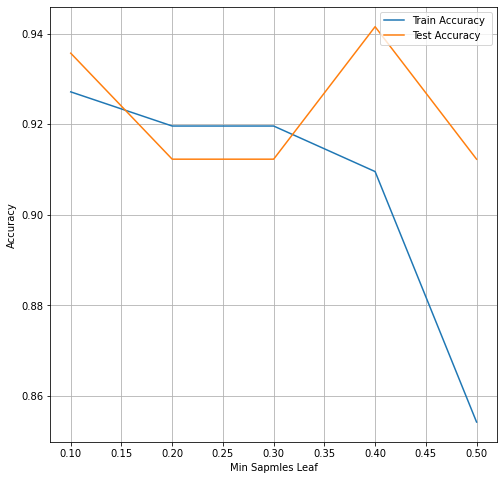

In [41]:
train_acc = []
test_acc = []
Arr = np.linspace(0.1, 0.5, 5)

for i in Arr:
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=i)
    decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_dt_FS = decision_tree_model.score(dfTestFeatures, dfTestLabels)
    acurracy_dt_FS_train = decision_tree_model.score(dfTrainFeatures, dfTrainLabels)
    train_acc.append(acurracy_dt_FS_train)
    test_acc.append(acurracy_dt_FS)

# plotting the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(np.linspace(0.1,0.5, 5, endpoint=True),train_acc,label= "Train Accuracy ")
plt.plot(np.linspace(0.1,0.5, 5, endpoint=True),test_acc,label = "Test Accuracy")
plt.legend(loc='upper right')
plt.ylabel("Accuracy")
plt.xlabel("Min Sapmles Leaf")
plt.grid()

In [42]:
from sklearn.ensemble import RandomForestClassifier

# applying Random Forest Classification to initial data.
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_rf = rf_model.score(dfTestFeatures, dfTestLabels)
predictions_rf = rf_model.predict(dfTestFeatures)
predictions_rf_prob = rf_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_rf, macro_recall_rf, macro_fscore_rf, _ = precision_recall_fscore_support(dfTestLabels, predictions_rf, average='macro')
micro_precision_rf, micro_recall_rf, micro_fscore_rf, _ = precision_recall_fscore_support(dfTestLabels, predictions_rf, average='micro')

# applying Random Forest Classification to PCA data that has 3 dimensions.
rf_model_3D = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_rf_3D = rf_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_rf_3D = rf_model_3D.predict(dfTestFeatures_3D)
predictions_rf_3D_prob = rf_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_rf_3D, macro_recall_rf_3D, macro_fscore_rf_3D, _ = precision_recall_fscore_support(dfTestLabels_3D, predictions_rf_3D, average='macro')
micro_precision_rf_3D, micro_recall_rf_3D, micro_fscore_rf_3D, _ = precision_recall_fscore_support(dfTestLabels_3D, predictions_rf_3D, average='micro')

# applying Random Forest Classification to PCA data that has 2 dimensions.
rf_model_2D = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_rf_2D = rf_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_rf_2D = rf_model_2D.predict(dfTestFeatures_2D)
predictions_rf_2D_prob = rf_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_rf_2D, macro_recall_rf_2D, macro_fscore_rf_2D, _ = precision_recall_fscore_support(dfTestLabels_2D, predictions_rf_2D, average='macro')
micro_precision_rf_2D, micro_recall_rf_2D, micro_fscore_rf_2D, _ = precision_recall_fscore_support(dfTestLabels_2D, predictions_rf_2D, average='micro')

# applying Random Forest Classification to data that has 4 Best Features.
rf_model_10B = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acurracy_rf_10B = rf_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_rf_10B = rf_model_10B.predict(dfTestFeatures_10B)
predictions_rf_10B_prob = rf_model_10B.predict_proba(dfTestFeatures_10B)[:,1]
macro_precision_rf_10B, macro_recall_rf_10B, macro_fscore_rf_10B, _ = precision_recall_fscore_support(dfTestLabels_10B, predictions_rf_10B, average='macro')
micro_precision_rf_10B, micro_recall_rf_10B, micro_fscore_rf_10B, _ = precision_recall_fscore_support(dfTestLabels_10B, predictions_rf_10B, average='micro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [43]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_rf))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_rf_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_rf_2D))
print('ACURRACY FOR (4 Best FEAT.) : ' + str(acurracy_rf_10B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_rf))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_rf_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_rf_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_rf_10B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_rf))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_rf_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_rf_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_rf_10B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_rf))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_rf_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_rf_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_rf_10B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_rf))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_rf_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_rf_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_rf_10B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_rf))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_rf_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_rf_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_rf_10B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_rf))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_rf_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_rf_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_rf_10B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9824561403508771
ACURRACY FOR PCA (3DIMENSION): 0.9532163742690059
ACURRACY FOR PCA (2DIMENSION): 0.9415204678362573
ACURRACY FOR (4 Best FEAT.) : 0.9298245614035088
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9758064516129032
MACRO PRECISION PCA (2DIMENSION): 0.9305555555555556
MACRO PRECISION PCA (3DIMENSION): 0.9431216931216931
MACRO PRECISION (4 Best FEA.)  : 0.9335625199872082
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9866071428571428
MACRO RECALL PCA (2DIMENSION): 0.9433262711864407
MACRO RECALL PCA (3DIMENSION): 0.9562651331719128
MACRO RECALL (4 Best FEA.)  : 0.9103359564164648
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9808159754683818
MACRO FSCORE PCA (2DIMENSION): 0.9362891207153502
MACRO FSCORE PCA (3DIMENSION): 0.9490312965722802
MACRO FSCORE (4 Best 

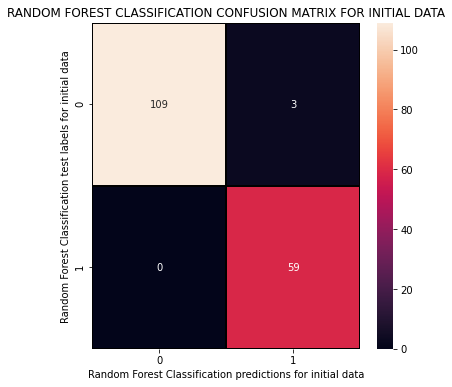

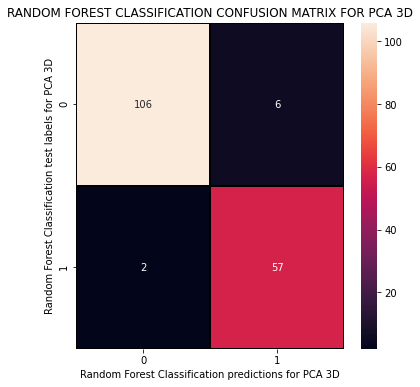

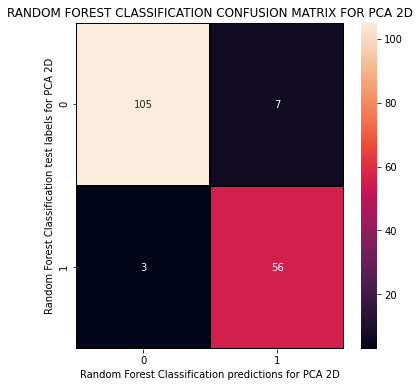

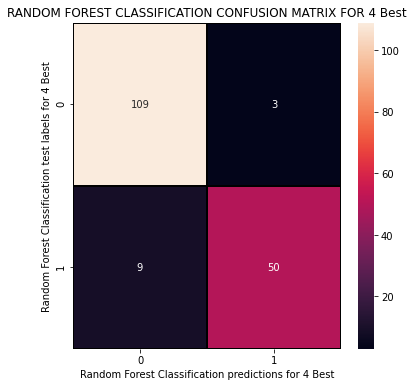

In [44]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_rf     = confusion_matrix(dfTestLabels, predictions_rf)
cm_rf_3D  = confusion_matrix(dfTestLabels, predictions_rf_3D)
cm_rf_2D  = confusion_matrix(dfTestLabels, predictions_rf_2D)
cm_rf_10B = confusion_matrix(dfTestLabels, predictions_rf_10B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for initial data")
plt.ylabel("Random Forest Classification test labels for initial data")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for PCA 3D")
plt.ylabel("Random Forest Classification test labels for PCA 3D")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for PCA 2D")
plt.ylabel("Random Forest Classification test labels for PCA 2D")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf_10B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for 4 Best")
plt.ylabel("Random Forest Classification test labels for 4 Best")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR 4 Best")
plt.show()


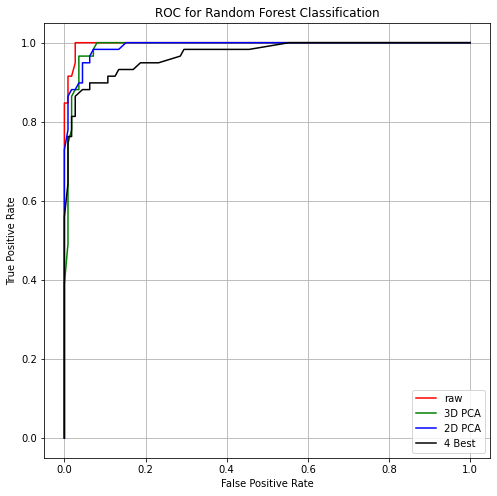

In [45]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_rf,     truePositiveRate_rf,     thresholds_rf     = roc_curve(dfTestLabels, predictions_rf_prob)
falsePositiveRate_rf_3D,  truePositiveRate_rf_3D,  thresholds_rf_3D  = roc_curve(dfTestLabels, predictions_rf_3D_prob)
falsePositiveRate_rf_2D,  truePositiveRate_rf_2D,  thresholds_rf_2D  = roc_curve(dfTestLabels, predictions_rf_2D_prob)
falsePositiveRate_rf_10B, truePositiveRate_rf_10B, thresholds_rf_10B = roc_curve(dfTestLabels, predictions_rf_10B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_rf, truePositiveRate_rf, color='red', label="raw")
plt.plot(falsePositiveRate_rf_3D, truePositiveRate_rf_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_rf_2D, truePositiveRate_rf_2D, color='blue', label="2D PCA")
plt.plot(falsePositiveRate_rf_10B, truePositiveRate_rf_10B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classification')
plt.legend()
plt.grid()

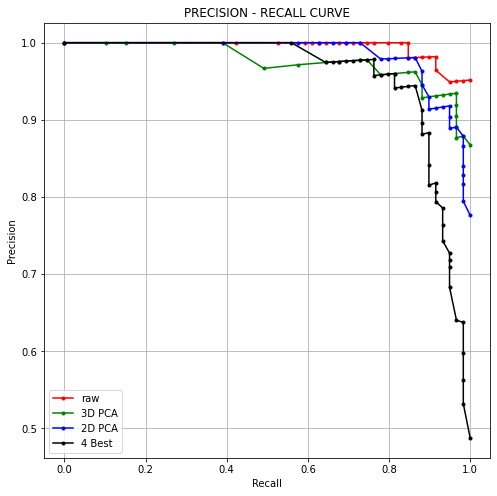

In [46]:
from sklearn.metrics import precision_recall_curve
precision_rf,     recall_rf,     _ = precision_recall_curve(npTestLabels,     predictions_rf_prob)
precision_rf_3D,  recall_rf_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_rf_3D_prob)
precision_rf_2D,  recall_rf_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_rf_2D_prob)
precision_rf_10B, recall_rf_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_rf_10B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_rf,     precision_rf,     marker='.', color="red", label="raw")
plt.plot(recall_rf_3D,  precision_rf_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_rf_2D,  precision_rf_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_rf_10B, precision_rf_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [47]:
from sklearn.naive_bayes import MultinomialNB

# applying Naive Bayes Classification to initial data.
naive_bayes_mult_model = MultinomialNB()
naive_bayes_mult_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_nb_mult = naive_bayes_mult_model.score(dfTestFeatures, dfTestLabels)
predictions_nb_mult = naive_bayes_mult_model.predict(dfTestFeatures)
predictions_nb_mult_prob = naive_bayes_mult_model.predict_proba(dfTestFeatures)[:,1]

# applying Naive Bayes Classification to 4 Best Data.
naive_bayes_mult_model_10B = MultinomialNB()
naive_bayes_mult_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acurracy_nb_mult_10B = naive_bayes_mult_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_nb_mult_10B = naive_bayes_mult_model_10B.predict(dfTestFeatures_10B)
predictions_nb_mult_prob_10B = naive_bayes_mult_model_10B.predict_proba(dfTestFeatures_10B)[:,1]

# printing the results.
print('ACURRACY FOR INITIAL DATA : ' + str(acurracy_nb_mult))
print('ACURRACY FOR 4 Best DATA : ' + str(acurracy_nb_mult_10B))

ACURRACY FOR INITIAL DATA : 0.8596491228070176
ACURRACY FOR 4 Best DATA : 0.6549707602339181


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


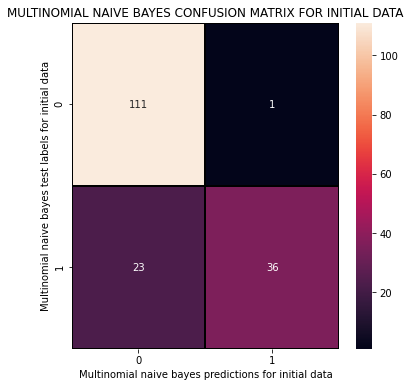

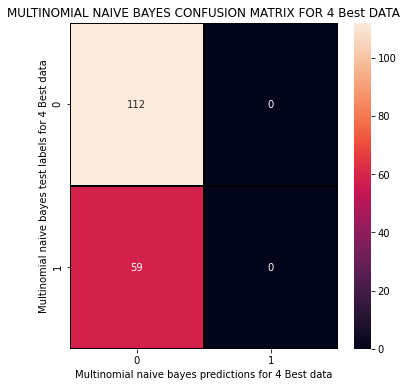

In [48]:
from sklearn.metrics import confusion_matrix
cm_nb_mult     = confusion_matrix(dfTestLabels, predictions_nb_mult)
cm_nb_mult_10B = confusion_matrix(dfTestLabels, predictions_nb_mult_10B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_mult, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Multinomial naive bayes predictions for initial data")
plt.ylabel("Multinomial naive bayes test labels for initial data")
plt.title("MULTINOMIAL NAIVE BAYES CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_mult_10B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Multinomial naive bayes predictions for 4 Best data")
plt.ylabel("Multinomial naive bayes test labels for 4 Best data")
plt.title("MULTINOMIAL NAIVE BAYES CONFUSION MATRIX FOR 4 Best DATA")
plt.show()

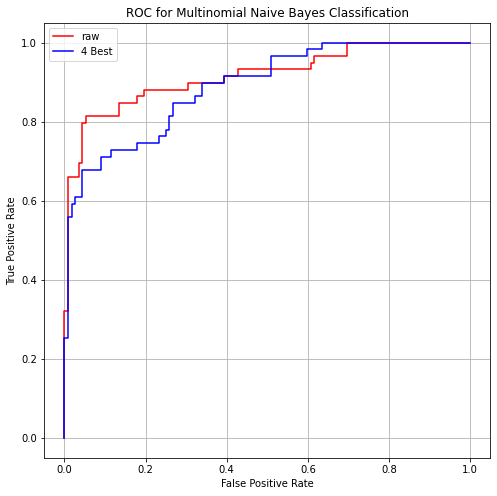

In [49]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_nb_mult, truePositiveRate_nb_mult, thresholds_nb_mult = roc_curve(dfTestLabels, predictions_nb_mult_prob)
falsePositiveRate_nb_mult_10B, truePositiveRate_nb_mult_10B, thresholds_nb_mult_10B = roc_curve(dfTestLabels, predictions_nb_mult_prob_10B)

# drawing the graph 
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_nb_mult, truePositiveRate_nb_mult, color='red', label="raw")
plt.plot(falsePositiveRate_nb_mult_10B, truePositiveRate_nb_mult_10B, color='blue', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multinomial Naive Bayes Classification')
plt.legend()
plt.grid()

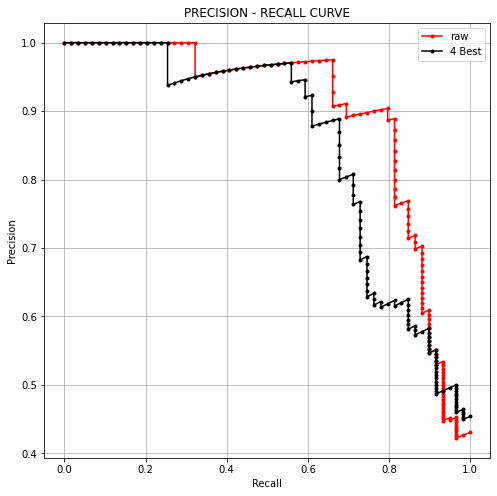

In [50]:
from sklearn.metrics import precision_recall_curve
precision_nb_mult,     recall_nb_mult,     _ = precision_recall_curve(npTestLabels,     predictions_nb_mult_prob)
precision_nb_mult_10B, recall_nb_mult_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_nb_mult_prob_10B)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_nb_mult,     precision_nb_mult,     marker='.', color="red", label="raw")
plt.plot(recall_nb_mult_10B, precision_nb_mult_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [51]:
from sklearn.naive_bayes import GaussianNB

# applying Naive Bayes Gaussian Classification to initial data.
naive_bayes_gaus_model = GaussianNB()
naive_bayes_gaus_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_nb_gaus = naive_bayes_gaus_model.score(dfTestFeatures, dfTestLabels)
predictions_nb_gaus = naive_bayes_gaus_model.predict(dfTestFeatures)
predictions_nb_gaus_prob = naive_bayes_gaus_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_nb_gaus, macro_recall_nb_gaus, macro_fscore_nb_gaus, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus, average='macro')
micro_precision_nb_gaus, micro_recall_nb_gaus, micro_fscore_nb_gaus, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus, average='micro')


# applying Naive Bayes Gaussian Classification to PCA 3D data.
naive_bayes_gaus_model_3D = GaussianNB()
naive_bayes_gaus_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_nb_gaus_3D = naive_bayes_gaus_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_nb_gaus_3D = naive_bayes_gaus_model_3D.predict(dfTestFeatures_3D)
predictions_nb_gaus_prob_3D = naive_bayes_gaus_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_nb_gaus_3D, macro_recall_nb_gaus_3D, macro_fscore_nb_gaus_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_3D, average='macro')
micro_precision_nb_gaus_3D, micro_recall_nb_gaus_3D, micro_fscore_nb_gaus_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_3D, average='micro')


# applying Naive Bayes Gaussian Classification to PCA 2D data.
naive_bayes_gaus_model_2D = GaussianNB()
naive_bayes_gaus_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_nb_gaus_2D = naive_bayes_gaus_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_nb_gaus_2D = naive_bayes_gaus_model_2D.predict(dfTestFeatures_2D)
predictions_nb_gaus_prob_2D = naive_bayes_gaus_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_nb_gaus_2D, macro_recall_nb_gaus_2D, macro_fscore_nb_gaus_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_2D, average='macro')
micro_precision_nb_gaus_2D, micro_recall_nb_gaus_2D, micro_fscore_nb_gaus_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_2D, average='micro')


# applying Naive Bayes Gaussian Classification to 4 Best Data.
naive_bayes_gaus_model_10B = GaussianNB()
naive_bayes_gaus_model_10B.fit(dfTrainFeatures_10B, dfTrainLabels_10B)
acurracy_nb_gaus_10B = naive_bayes_gaus_model_10B.score(dfTestFeatures_10B, dfTestLabels_10B)
predictions_nb_gaus_10B = naive_bayes_gaus_model_10B.predict(dfTestFeatures_10B)
predictions_nb_gaus_prob_10B = naive_bayes_gaus_model_10B.predict_proba(dfTestFeatures_10B)[:,1]
macro_precision_nb_gaus_10B, macro_recall_nb_gaus_10B, macro_fscore_nb_gaus_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_10B, average='macro')
micro_precision_nb_gaus_10B, micro_recall_nb_gaus_10B, micro_fscore_nb_gaus_10B, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_10B, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [52]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_nb_gaus))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_nb_gaus_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_nb_gaus_2D))
print('ACURRACY FOR 4 Best FEATURES: ' + str(acurracy_nb_gaus_10B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_nb_gaus))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_nb_gaus_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_nb_gaus_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_nb_gaus_10B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_nb_gaus))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_nb_gaus_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_nb_gaus_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_nb_gaus_10B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_nb_gaus))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_nb_gaus_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_nb_gaus_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_nb_gaus_10B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_nb_gaus))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_nb_gaus_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_nb_gaus_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_nb_gaus_10B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_nb_gaus))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_nb_gaus_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_nb_gaus_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_nb_gaus_10B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_nb_gaus))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_nb_gaus_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_nb_gaus_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_nb_gaus_10B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9473684210526315
ACURRACY FOR PCA (3DIMENSION): 0.9415204678362573
ACURRACY FOR PCA (2DIMENSION): 0.9415204678362573
ACURRACY FOR 4 Best FEATURES: 0.935672514619883
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9378514353358982
MACRO PRECISION PCA (2DIMENSION): 0.9385964912280702
MACRO PRECISION PCA (3DIMENSION): 0.9353056900726393
MACRO PRECISION (4 Best FEA.)  : 0.9338509316770187
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9477905569007263
MACRO RECALL PCA (2DIMENSION): 0.9312953995157385
MACRO RECALL PCA (3DIMENSION): 0.9353056900726393
MACRO RECALL (4 Best FEA.)  : 0.9228208232445521
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9424479264051456
MACRO FSCORE PCA (2DIMENSION): 0.9347726579188282
MACRO FSCORE PCA (3DIMENSION): 0.9353056900726393
MACRO FSCORE (4 Best F

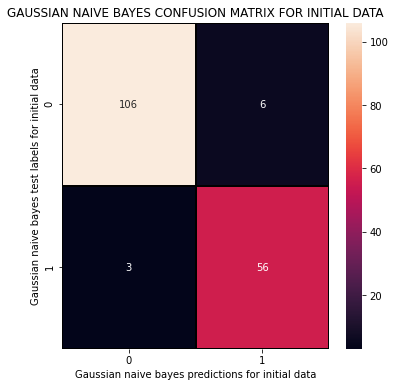

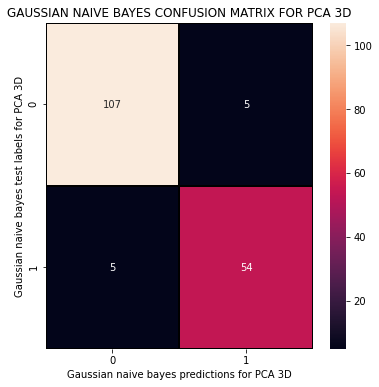

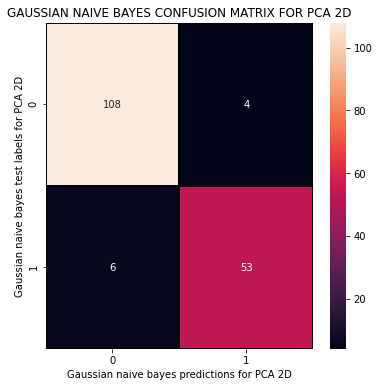

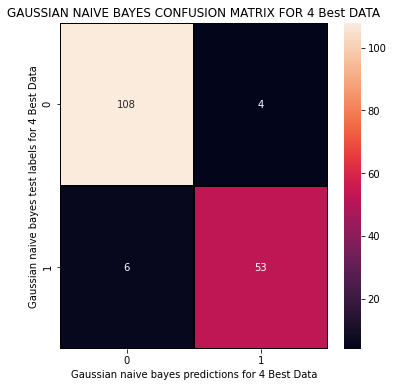

In [53]:
from sklearn.metrics import confusion_matrix
cm_nb_gaussian     = confusion_matrix(dfTestLabels, predictions_nb_gaus)
cm_nb_gaussian_3D  = confusion_matrix(dfTestLabels, predictions_nb_gaus_3D)
cm_nb_gaussian_2D  = confusion_matrix(dfTestLabels, predictions_nb_gaus_2D)
cm_nb_gaussian_10B = confusion_matrix(dfTestLabels, predictions_nb_gaus_2D)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for initial data")
plt.ylabel("Gaussian naive bayes test labels for initial data")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for PCA 3D")
plt.ylabel("Gaussian naive bayes test labels for PCA 3D")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for PCA 2D")
plt.ylabel("Gaussian naive bayes test labels for PCA 2D")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian_10B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for 4 Best Data")
plt.ylabel("Gaussian naive bayes test labels for 4 Best Data")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR 4 Best DATA")
plt.show()

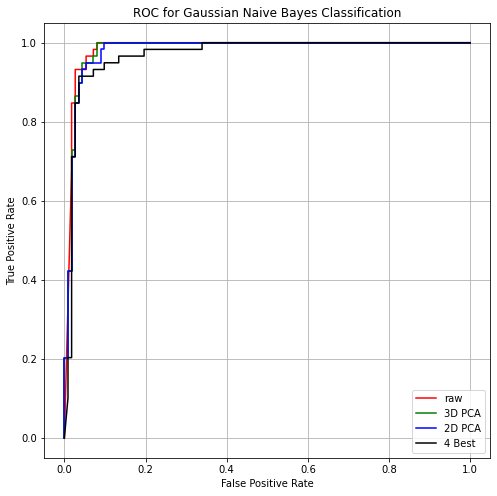

In [54]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_nb_gaus,     truePositiveRate_nb_gaus,     thresholds_nb_gaus     = roc_curve(dfTestLabels, predictions_nb_gaus_prob)
falsePositiveRate_nb_gaus_3D,  truePositiveRate_nb_gaus_3D,  thresholds_nb_gaus_3D  = roc_curve(dfTestLabels, predictions_nb_gaus_prob_3D)
falsePositiveRate_nb_gaus_2D,  truePositiveRate_nb_gaus_2D,  thresholds_nb_gaus_2D  = roc_curve(dfTestLabels, predictions_nb_gaus_prob_2D)
falsePositiveRate_nb_gaus_10B, truePositiveRate_nb_gaus_10B, thresholds_nb_gaus_10B = roc_curve(dfTestLabels, predictions_nb_gaus_prob_10B)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_nb_gaus, truePositiveRate_nb_gaus, color='red', label="raw")
plt.plot(falsePositiveRate_nb_gaus_3D,  truePositiveRate_nb_gaus_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_nb_gaus_2D,  truePositiveRate_nb_gaus_2D, color='blue', label="2D PCA")
plt.plot(falsePositiveRate_nb_gaus_10B, truePositiveRate_nb_gaus_10B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gaussian Naive Bayes Classification')
plt.legend()
plt.grid()

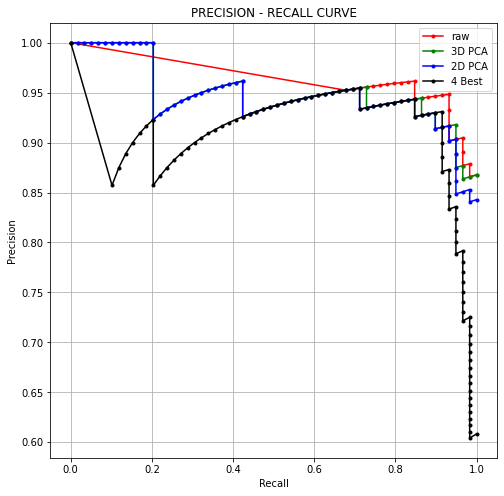

In [55]:
from sklearn.metrics import precision_recall_curve
precision_nb_gaus,     recall_nb_gaus,     _ = precision_recall_curve(npTestLabels,     predictions_nb_gaus_prob)
precision_nb_gaus_3D,  recall_nb_gaus_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_nb_gaus_prob_3D)
precision_nb_gaus_2D,  recall_nb_gaus_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_nb_gaus_prob_2D)
precision_nb_gaus_10B, recall_nb_gaus_10B, _ = precision_recall_curve(npTestLabels_10B, predictions_nb_gaus_prob_10B)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_nb_gaus,     precision_nb_gaus,     marker='.', color="red", label="raw")
plt.plot(recall_nb_gaus_3D,  precision_nb_gaus_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_nb_gaus_2D,  precision_nb_gaus_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_nb_gaus_10B, precision_nb_gaus_10B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [0]:
def getAcurracy(predictions, labels):
    truePositives = np.sum( np.logical_and( labels, predictions) )
    falsePositives = np.sum( np.logical_and( np.logical_not(labels), predictions) ) 
    falseNegatives = np.sum( np.logical_and( labels, np.logical_not(predictions)) ) 
    trueNegatives  = np.sum( np.logical_and( np.logical_not(labels), np.logical_not(predictions)) )
    acurracy = (truePositives + trueNegatives) / (truePositives + falsePositives + falseNegatives + trueNegatives)
    return acurracy

In [0]:
class ANNModel_1Hidden(nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super().__init__()
        self.model1 = nn.Linear(inputSize, hiddenSize)
        self.model2 = nn.Linear(hiddenSize, outputSize)
  
    def propagateForward(self, x):
        y_head1 = torch.sigmoid( self.model1(x) )
        y_head2 = torch.sigmoid( self.model2(y_head1) )
        return y_head2      
  
    def predictTests(self, xTest):
        predictions = self.propagateForward(xTest)
    
        for i in range(predictions.shape[0]):
            if (predictions[i] > 0.5):
                predictions[i] = 1
            else:
                predictions[i] = 0

        return predictions
    
    def predictTestsProba(self, xTest):
        return self.propagateForward(xTest)

In [0]:
ann_model_1hidden     = ANNModel_1Hidden(30, 5, 1)
ann_model_1hidden_2D  = ANNModel_1Hidden( 2, 5, 1)
ann_model_1hidden_3D  = ANNModel_1Hidden( 3, 5, 1)
ann_model_1hidden_10B = ANNModel_1Hidden(10, 5, 1)
criterion = nn.BCELoss()
optimizer_1hidden = torch.optim.Adam(ann_model_1hidden.parameters(), lr=0.01)
optimizer_1hidden_3D  = torch.optim.Adam(ann_model_1hidden_3D.parameters(),  lr=0.01)
optimizer_1hidden_2D  = torch.optim.Adam(ann_model_1hidden_2D.parameters(),  lr=0.01)
optimizer_1hidden_10B = torch.optim.Adam(ann_model_1hidden_10B.parameters(), lr=0.01)

In [0]:
for i in range(1000):
    y_head = ann_model_1hidden.propagateForward(tensorTrainFeatures.float())    
    y_head_2D = ann_model_1hidden_2D.propagateForward(tensorTrainFeatures_2D.float())    
    y_head_3D = ann_model_1hidden_3D.propagateForward(tensorTrainFeatures_3D.float())    
      
    
    loss_1hidden = criterion(y_head, tensorTrainLabels.float())
    loss_1hidden_2D  = criterion(y_head_2D, tensorTrainLabels_2D.float())
    loss_1hidden_3D  = criterion(y_head_3D, tensorTrainLabels_3D.float())
    

    optimizer_1hidden.zero_grad()
    optimizer_1hidden_2D.zero_grad()
    optimizer_1hidden_3D.zero_grad()
    
    
    loss_1hidden.backward()
    loss_1hidden_2D.backward()
    loss_1hidden_3D.backward()
   
    
    optimizer_1hidden.step()
    optimizer_1hidden_2D.step()
    optimizer_1hidden_3D.step()
    

In [0]:
tensorPredictions_1hidden     = ann_model_1hidden.predictTests( tensorTestFeatures.float() )
tensorPredictions_1hidden_2D  = ann_model_1hidden_2D.predictTests( tensorTestFeatures_2D.float() )
tensorPredictions_1hidden_3D  = ann_model_1hidden_3D.predictTests( tensorTestFeatures_3D.float() )

npPredictions_1hidden = tensorPredictions_1hidden.detach().numpy()
npPredictions_1hidden_2D  = tensorPredictions_1hidden_2D.detach().numpy()
npPredictions_1hidden_3D  = tensorPredictions_1hidden_3D.detach().numpy()


tensorPredictions_1hidden_proba     = ann_model_1hidden.predictTestsProba( tensorTestFeatures.float() )
tensorPredictions_1hidden_2D_proba  = ann_model_1hidden_2D.predictTestsProba( tensorTestFeatures_2D.float() )
tensorPredictions_1hidden_3D_proba  = ann_model_1hidden_3D.predictTestsProba( tensorTestFeatures_3D.float() )


npPredictions_1hidden_proba = tensorPredictions_1hidden_proba.detach().numpy()
npPredictions_1hidden_2D_proba  = tensorPredictions_1hidden_2D_proba.detach().numpy()
npPredictions_1hidden_3D_proba  = tensorPredictions_1hidden_3D_proba.detach().numpy()


acurracy_1hidden     = getAcurracy(npPredictions_1hidden, npTestLabels)
acurracy_1hidden_2D  = getAcurracy(npPredictions_1hidden_2D,  npTestLabels_2D)
acurracy_1hidden_3D  = getAcurracy(npPredictions_1hidden_3D,  npTestLabels_3D)


macro_precision_ann1, macro_recall_ann1, macro_fscore_ann1, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden, average='macro')
macro_precision_ann1_2D, macro_recall_ann1_2D, macro_fscore_ann1_2D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_2D, average='macro')
macro_precision_ann1_3D, macro_recall_ann1_3D, macro_fscore_ann1_3D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_3D, average='macro')


micro_precision_ann1, micro_recall_ann1, micro_fscore_ann1, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden, average='micro')
micro_precision_ann1_2D,  micro_recall_ann1_2D,  micro_fscore_ann1_2D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_2D,  average='micro')
micro_precision_ann1_3D,  micro_recall_ann1_3D,  micro_fscore_ann1_3D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_3D,  average='micro')


In [61]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_1hidden))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_1hidden_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_1hidden_2D))

print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_ann1))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_ann1_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_ann1_3D))

print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_ann1))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_ann1_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_ann1_3D))

print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_ann1))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_ann1_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_ann1_3D))

print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_ann1))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_ann1_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_ann1_3D))

print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_ann1))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_ann1_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_ann1_3D))

print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_ann1))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_ann1_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_ann1_3D))

print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9649122807017544
ACURRACY FOR PCA (3DIMENSION): 0.9766081871345029
ACURRACY FOR PCA (2DIMENSION): 0.9590643274853801
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9611834140435835
MACRO PRECISION PCA (2DIMENSION): 0.9531531531531532
MACRO PRECISION PCA (3DIMENSION): 0.9708643815201192
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9611834140435835
MACRO RECALL PCA (2DIMENSION): 0.9567191283292978
MACRO RECALL PCA (3DIMENSION): 0.9781325665859564
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9611834140435835
MACRO FSCORE PCA (2DIMENSION): 0.9548931680295436
MACRO FSCORE PCA (3DIMENSION): 0.9743243243243243
------------------------------------------------------
MICRO PRECISION FOR INITIAL DATA: 0.9649122807017544
MICRO PRECISION PCA (2DIMENSION): 0.9590643274853801
MICRO PREC

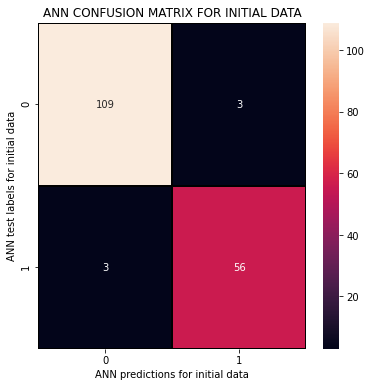

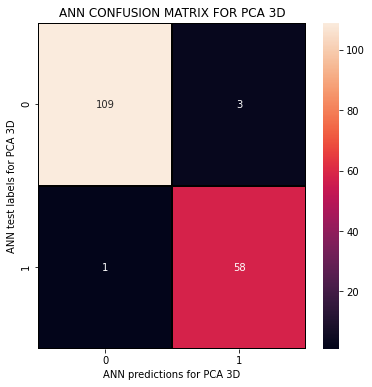

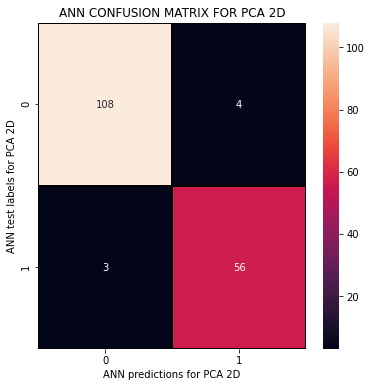

In [62]:
from sklearn.metrics import confusion_matrix
cm_ann1     = confusion_matrix(dfTestLabels, npPredictions_1hidden)
cm_ann1_3D  = confusion_matrix(dfTestLabels, npPredictions_1hidden_3D)
cm_ann1_2D  = confusion_matrix(dfTestLabels, npPredictions_1hidden_2D)


f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for initial data")
plt.ylabel("ANN test labels for initial data")
plt.title("ANN CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 3D")
plt.ylabel("ANN test labels for PCA 3D")
plt.title("ANN CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 2D")
plt.ylabel("ANN test labels for PCA 2D")
plt.title("ANN CONFUSION MATRIX FOR PCA 2D")
plt.show()


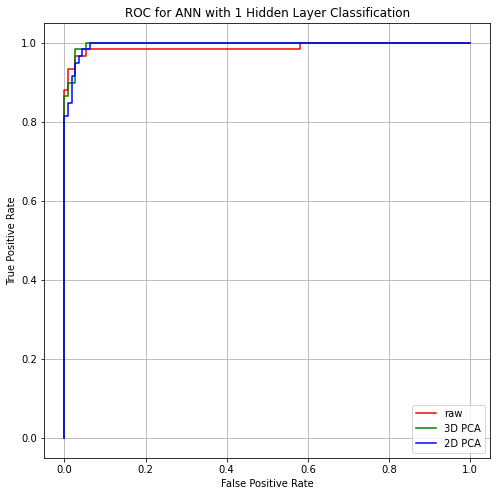

In [63]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_ANN1,     truePositiveRate_ANN1,     thresholds_ANN1     = roc_curve(dfTestLabels, npPredictions_1hidden_proba)
falsePositiveRate_ANN1_3D,  truePositiveRate_ANN1_3D,  thresholds_ANN1_3D  = roc_curve(dfTestLabels, npPredictions_1hidden_3D_proba)
falsePositiveRate_ANN1_2D,  truePositiveRate_ANN1_2D,  thresholds_ANN1_2D  = roc_curve(dfTestLabels, npPredictions_1hidden_2D_proba)


# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_ANN1, truePositiveRate_ANN1, color='red', label="raw")
plt.plot(falsePositiveRate_ANN1_3D,  truePositiveRate_ANN1_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_ANN1_2D,  truePositiveRate_ANN1_2D,  color='blue', label="2D PCA")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ANN with 1 Hidden Layer Classification')
plt.legend()
plt.grid()

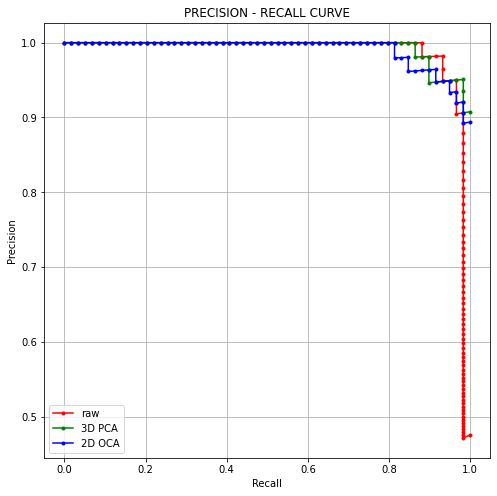

In [64]:
from sklearn.metrics import precision_recall_curve
precision_ann_1hidden,     recall_ann_1hidden,     _ = precision_recall_curve(npTestLabels,     npPredictions_1hidden_proba)
precision_ann_1hidden_3D,  recall_ann_1hidden_3D,  _ = precision_recall_curve(npTestLabels_3D,  npPredictions_1hidden_3D_proba)
precision_ann_1hidden_2D,  recall_ann_1hidden_2D,  _ = precision_recall_curve(npTestLabels_2D,  npPredictions_1hidden_2D_proba)


f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_ann_1hidden,     precision_ann_1hidden,     marker='.', color="red", label="raw")
plt.plot(recall_ann_1hidden_3D,  precision_ann_1hidden_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_ann_1hidden_2D,  precision_ann_1hidden_2D,  marker='.', color="blue", label="2D OCA")


plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [0]:
class ANNModel_2Hidden(nn.Module):
    def __init__(self, inputSize, hiddenSize1, hiddenSize2, outputSize):
        super().__init__()
        self.model1 = nn.Linear(inputSize, hiddenSize1)
        self.model2 = nn.Linear(hiddenSize1, hiddenSize2)
        self.model3 = nn.Linear(hiddenSize2, outputSize)
  
    def propagateForward(self, x):
        y_head1 = torch.sigmoid( self.model1(x) )
        y_head2 = torch.sigmoid( self.model2(y_head1) )
        y_head3 = torch.sigmoid( self.model3(y_head2) )
        return y_head3      
  
    def predictTests(self, xTest):
        predictions = self.propagateForward(xTest)
    
        for i in range(predictions.shape[0]):
            if (predictions[i] > 0.5):
                predictions[i] = 1
            else:
                predictions[i] = 0

        return predictions
    
    def predictTestsProba(self, xTest):
        return self.propagateForward(xTest)

In [0]:
ann_model_2hidden     = ANNModel_2Hidden(30, 5, 5, 1)
ann_model_2hidden_2D  = ANNModel_2Hidden( 2, 5, 5, 1)
ann_model_2hidden_3D  = ANNModel_2Hidden( 3, 5, 5, 1)
ann_model_2hidden_10B = ANNModel_2Hidden(10, 5, 5, 1)
criterion = nn.BCELoss()
optimizer_2hidden = torch.optim.Adam(ann_model_2hidden.parameters(), lr=0.01)
optimizer_2hidden_3D  = torch.optim.Adam(ann_model_2hidden_3D.parameters(),  lr=0.01)
optimizer_2hidden_2D  = torch.optim.Adam(ann_model_2hidden_2D.parameters(),  lr=0.01)
optimizer_2hidden_10B = torch.optim.Adam(ann_model_2hidden_10B.parameters(), lr=0.01)

In [0]:
for i in range(1000):
    y_head = ann_model_2hidden.propagateForward(tensorTrainFeatures.float())    
    y_head_2D = ann_model_2hidden_2D.propagateForward(tensorTrainFeatures_2D.float())    
    y_head_3D = ann_model_2hidden_3D.propagateForward(tensorTrainFeatures_3D.float())    
    
    
    loss_2hidden = criterion(y_head, tensorTrainLabels.float())
    loss_2hidden_2D  = criterion(y_head_2D, tensorTrainLabels_2D.float())
    loss_2hidden_3D  = criterion(y_head_3D, tensorTrainLabels_3D.float())
    

    optimizer_2hidden.zero_grad()
    optimizer_2hidden_2D.zero_grad()
    optimizer_2hidden_3D.zero_grad()
    
    
    loss_2hidden.backward()
    loss_2hidden_2D.backward()
    loss_2hidden_3D.backward()
    
    
    optimizer_2hidden.step()
    optimizer_2hidden_2D.step()
    optimizer_2hidden_3D.step()
    

In [0]:
tensorPredictions_2hidden     = ann_model_2hidden.predictTests( tensorTestFeatures.float() )
tensorPredictions_2hidden_2D  = ann_model_2hidden_2D.predictTests( tensorTestFeatures_2D.float() )
tensorPredictions_2hidden_3D  = ann_model_2hidden_3D.predictTests( tensorTestFeatures_3D.float() )


npPredictions_2hidden = tensorPredictions_2hidden.detach().numpy()
npPredictions_2hidden_2D  = tensorPredictions_2hidden_2D.detach().numpy()
npPredictions_2hidden_3D  = tensorPredictions_2hidden_3D.detach().numpy()


tensorPredictions_2hidden_proba     = ann_model_2hidden.predictTestsProba( tensorTestFeatures.float() )
tensorPredictions_2hidden_2D_proba  = ann_model_2hidden_2D.predictTestsProba( tensorTestFeatures_2D.float() )
tensorPredictions_2hidden_3D_proba  = ann_model_2hidden_3D.predictTestsProba( tensorTestFeatures_3D.float() )


npPredictions_2hidden_proba = tensorPredictions_2hidden_proba.detach().numpy()
npPredictions_2hidden_2D_proba  = tensorPredictions_2hidden_2D_proba.detach().numpy()
npPredictions_2hidden_3D_proba  = tensorPredictions_2hidden_3D_proba.detach().numpy()


acurracy_2hidden     = getAcurracy(npPredictions_2hidden, npTestLabels)
acurracy_2hidden_2D  = getAcurracy(npPredictions_2hidden_2D,  npTestLabels_2D)
acurracy_2hidden_3D  = getAcurracy(npPredictions_2hidden_3D,  npTestLabels_3D)


macro_precision_ann2, macro_recall_ann2, macro_fscore_ann2, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden, average='macro')
macro_precision_ann2_2D, macro_recall_ann2_2D, macro_fscore_ann2_2D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_2D, average='macro')
macro_precision_ann2_3D, macro_recall_ann2_3D, macro_fscore_ann2_3D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_3D, average='macro')


micro_precision_ann2, micro_recall_ann2, micro_fscore_ann2, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden, average='micro')
micro_precision_ann2_2D,  micro_recall_ann2_2D,  micro_fscore_ann2_2D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_2D,  average='micro')
micro_precision_ann2_3D,  micro_recall_ann2_3D,  micro_fscore_ann2_3D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_3D,  average='micro')


In [69]:
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_2hidden))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_2hidden_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_2hidden_2D))

print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_ann2))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_ann2_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_ann2_3D))

print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_ann2))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_ann2_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_ann2_3D))

print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_ann2))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_ann2_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_ann2_3D))

print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_ann2))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_ann2_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_ann2_3D))

print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_ann2))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_ann2_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_ann2_3D))

print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_ann2))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_ann2_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_ann2_3D))

print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9415204678362573
ACURRACY FOR PCA (3DIMENSION): 0.9707602339181286
ACURRACY FOR PCA (2DIMENSION): 0.9649122807017544
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9305555555555556
MACRO PRECISION PCA (2DIMENSION): 0.9581222056631893
MACRO PRECISION PCA (3DIMENSION): 0.9609375
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9433262711864407
MACRO RECALL PCA (2DIMENSION): 0.9651937046004843
MACRO RECALL PCA (3DIMENSION): 0.9776785714285714
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9362891207153502
MACRO FSCORE PCA (2DIMENSION): 0.9614864864864865
MACRO FSCORE PCA (3DIMENSION): 0.9682592716338123
------------------------------------------------------
MICRO PRECISION FOR INITIAL DATA: 0.9415204678362573
MICRO PRECISION PCA (2DIMENSION): 0.9649122807017544
MICRO PRECISION PCA

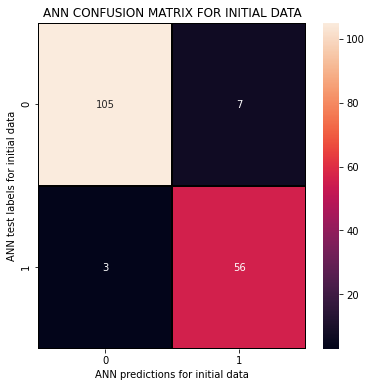

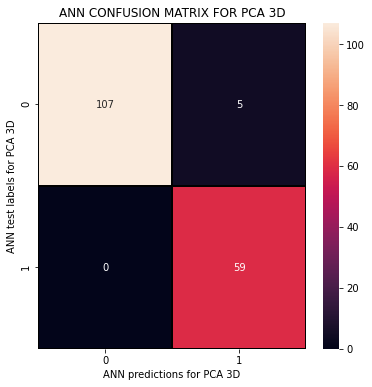

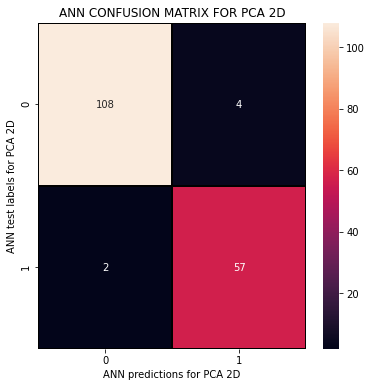

In [70]:
from sklearn.metrics import confusion_matrix
cm_ann2     = confusion_matrix(dfTestLabels, npPredictions_2hidden)
cm_ann2_3D  = confusion_matrix(dfTestLabels, npPredictions_2hidden_3D)
cm_ann2_2D  = confusion_matrix(dfTestLabels, npPredictions_2hidden_2D)


f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for initial data")
plt.ylabel("ANN test labels for initial data")
plt.title("ANN CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 3D")
plt.ylabel("ANN test labels for PCA 3D")
plt.title("ANN CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 2D")
plt.ylabel("ANN test labels for PCA 2D")
plt.title("ANN CONFUSION MATRIX FOR PCA 2D")
plt.show()



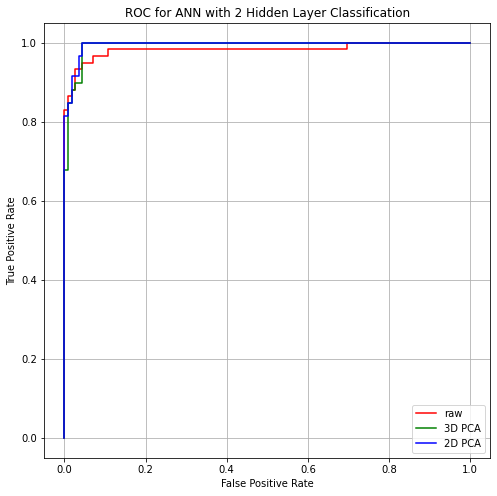

In [71]:
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_ANN2,     truePositiveRate_ANN2,     thresholds_ANN2     = roc_curve(dfTestLabels, npPredictions_2hidden_proba)
falsePositiveRate_ANN2_3D,  truePositiveRate_ANN2_3D,  thresholds_ANN2_3D  = roc_curve(dfTestLabels, npPredictions_2hidden_3D_proba)
falsePositiveRate_ANN2_2D,  truePositiveRate_ANN2_2D,  thresholds_ANN2_2D  = roc_curve(dfTestLabels, npPredictions_2hidden_2D_proba)


# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_ANN2, truePositiveRate_ANN2, color='red', label="raw")
plt.plot(falsePositiveRate_ANN2_3D,  truePositiveRate_ANN2_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_ANN2_2D,  truePositiveRate_ANN2_2D,  color='blue',  label="2D PCA")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ANN with 2 Hidden Layer Classification')
plt.legend()
plt.grid()

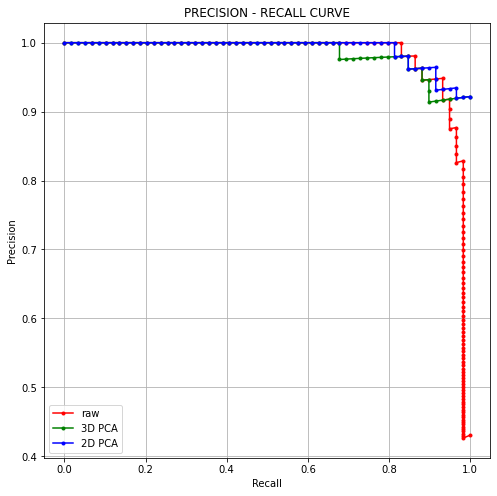

In [72]:
from sklearn.metrics import precision_recall_curve
precision_ann_2hidden,     recall_ann_2hidden,     _ = precision_recall_curve(npTestLabels,     npPredictions_2hidden_proba)
precision_ann_2hidden_3D,  recall_ann_2hidden_3D,  _ = precision_recall_curve(npTestLabels_3D,  npPredictions_2hidden_3D_proba)
precision_ann_2hidden_2D,  recall_ann_2hidden_2D,  _ = precision_recall_curve(npTestLabels_2D,  npPredictions_2hidden_2D_proba)


f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_ann_2hidden,     precision_ann_2hidden,     marker='.', color="red",   label="raw")
plt.plot(recall_ann_2hidden_3D,  precision_ann_2hidden_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_ann_2hidden_2D,  precision_ann_2hidden_2D,  marker='.', color="blue",  label="2D PCA")


plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()